In [46]:
import sys
del sys.modules['config']
del sys.modules['entropy']
del sys.modules['featureExtraction']
del sys.modules['pos']

In [47]:
# imports
import sys
import os
import logging

import config
from entropy import videoEntropyMatrix

import featureExtraction as fe

import pandas as pd
import numpy as np

In [ ]:

fe.main("--splits [0.15, 0.70, 0.15]")

Phases ratios: [0.15, 0.7, 0.15]
Logging to C:\IAAA\TER\predpres-2019-0215_19-58-17.log
pathsList: [['C:\\IAAA\\TER\\data\\ACORFORMED\\Data\\E04D\\Casque\\Unity\\E4D-Casque-Unity-out_record_DATE17-4-21_13-35-20.txt', 'C:\\IAAA\\TER\\data\\ACORFORMED\\Data\\E04D\\Casque\\Video\\E4D-Casque-Video-00023-1.mp4'], ['C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\Cave\\data\\E04D-03-Cave-micro.wav', 'C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\Cave\\data\\asr-trans\\E04D-03-Cave-micro.E4D-latin1.xra', 'C:\\IAAA\\TER\\data\\ACORFORMED\\Data\\E04D\\Cave\\Unity\\E4D-Cave-Unity-out_record_DATE17-4-21_13-48-2.txt', 'C:\\IAAA\\TER\\data\\ACORFORMED\\Data\\E04D\\Cave\\Video\\E4D-Cave-Video-00025-1.mp4'], ['C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\PC\\data\\E04D-02-PC-micro.wav', 'C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\PC\\data\\asr-trans\\E04D-02-PC-micro.E4D-latin1.xra', 'C:\\IAAA\\TER\\data\\ACORFORMED\\Data\\E04D\\PC\\Unity\\E4D-PC-Unity-out_record_DATE17-4-21_13-49-39.txt', 'C:\\IAA

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\tokenize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\vocab\\fra.vocab -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\Cave\\data\\asr-trans\\E04D-03-Cave-micro.E4D-latin1.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\Cave\\data\\E04D-03-Cave-micro-token.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\Cave\\data\\E04D-03-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\Cave\\data\\E04D-03-Cave-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\Cave\\data\\E04D-03-Cave-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\Cave\\data\\E04D-03-Cave-micro-phon.eaf -I C:\\IAAA\\TER\\data\\C

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  35.8921875
s2 :  203.3890625
1.557
interjection
1.557
punctuation
1.897
punctuation
1.897
interjection
3.24
adverb
3.24
punctuation
3.56
pronoun
3.62
verb
3.92
pronoun
3.92
punctuation
7.37
adverb
7.37
punctuation
7.74
pronoun
7.85
verb
8.14
pronoun
13.76
punctuation
13.76
adverb
14.1
determiner
14.24
noun
14.55
auxiliary
15.28
auxiliary
15.49
verb
15.7
preposition
15.98
determiner
16.149
pronoun
16.149
punctuation
17.134
pronoun
17.224
verb
17.384
preposition
17.554
noun
17.924
preposition
18.114
determiner
18.204
noun
19.185
pronoun
19.265
pronoun
19.265
auxiliary
19.395
verb
19.755
preposition
20.075
determiner
20.105
noun
20.105
punctuation
22.9
punctuation
22.9
adverb
23.4
pronoun
23.52
auxiliary
23.55
verb
23.99
determiner
24.29
determiner
24.36
adjective
24.98
noun
25.69
punctuation
25.69
pronoun
26.61
preposition
26.84
pronoun
27.08
pronoun
27.25
verb
28.11
determiner
28.52
noun
29.04
adjective
29.04
punctuation
30.13
conjunction
30.27
pronoun
30.36
verb
30.75
determiner


Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassation\E04D\PC\data\asr-trans\E04D-02-PC-micro.E4D-latin1.xra] Loading annotation file...
[C:\IAAA\TER\data\CorpusHMPassation\E04D\PC\data\asr-trans\E04D-02-PC-micro.E4D-latin1.xra] Yet a tier named 'ASR-Revised', can't duplicate in 'ASR-Transcription'
[C:\IAAA\TER\data\CorpusHMPassation\E04D\PC\data\asr-trans\E04D-02-PC-micro.E4D-latin1.xra] /!\ Destination file 'C:\IAAA\TER\data\CorpusHMPassation\E04D\PC\data\asr-trans\E04D-02-PC-micro.E4D-latin1.eaf' yet exist, not overwritten
[C:\IAAA\TER\data\CorpusHMPassation\E04D\PC\data\asr-trans\E04D-02-PC-micro.E4D-latin1.xra] /!\ Destination file 'C:\IAAA\TER\data\CorpusHMPassation\E04D\PC\data\asr-trans\E04D-02-PC-micro.E4D-latin1.TextGrid' yet exist, not overwritten

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\tokenize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\vocab\\fra.vocab -i C:\\IAAA\\

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  38.3390625
s2 :  217.2546875
4.24
punctuation
4.24
interjection
4.63
punctuation
4.63
interjection
7.74
adverb
7.74
punctuation
8.119
pronoun
8.22
verb
8.49
pronoun
8.49
punctuation
12.03
adverb
12.03
punctuation
12.49
pronoun
12.64
verb
12.92
pronoun
18.73
adverb
19.1
determiner
19.3
noun
19.3
punctuation
19.85
auxiliary
19.85
pronoun
19.98
adverb
20.12
verb
20.4
adverb
20.86
conjunction
21.3
conjunction
21.48
punctuation
21.48
adjective
26.22
punctuation
26.22
adverb
26.75
pronoun
26.88
auxiliary
26.92
verb
27.33
determiner
27.56
determiner
27.66
punctuation
27.66
noun
28.4
determiner
28.49
noun
29.14
pronoun
29.25
auxiliary
29.25
auxiliary
30.12
pronoun
30.26
auxiliary
30.26
auxiliary
30.59
verb
30.59
punctuation
32.64
pronoun
32.95
auxiliary
33.01
verb
33.81
pronoun
33.93
verb
33.93
punctuation
34.44
pronoun
34.55
auxiliary
34.6
verb
34.71
preposition
34.79
verb
34.96
determiner
34.99
punctuation
34.99
noun
37.64
conjunction
37.81
pronoun
37.87
verb
38.24
adverb
38.24
noun
38

Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassation\E05E\Casque\data\asr-trans\E05E-03-Casque-micro.E5E-latin1.xra] Loading annotation file...
[C:\IAAA\TER\data\CorpusHMPassation\E05E\Casque\data\asr-trans\E05E-03-Casque-micro.E5E-latin1.xra] Yet a tier named 'ASR-Revised', can't duplicate in 'ASR-Transcription'
[C:\IAAA\TER\data\CorpusHMPassation\E05E\Casque\data\asr-trans\E05E-03-Casque-micro.E5E-latin1.xra] /!\ Destination file 'C:\IAAA\TER\data\CorpusHMPassation\E05E\Casque\data\asr-trans\E05E-03-Casque-micro.E5E-latin1.eaf' yet exist, not overwritten
[C:\IAAA\TER\data\CorpusHMPassation\E05E\Casque\data\asr-trans\E05E-03-Casque-micro.E5E-latin1.xra] /!\ Destination file 'C:\IAAA\TER\data\CorpusHMPassation\E05E\Casque\data\asr-trans\E05E-03-Casque-micro.E5E-latin1.TextGrid' yet exist, not overwritten

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\tokenize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  29.898
s2 :  169.422
2.15
noun
2.45
noun
2.45
punctuation
3.58
punctuation
3.58
adverb
4.03
punctuation
4.03
pronoun
4.03
verb
12.86
pronoun
13.08
verb
13.34
adverb
13.64
adverb
13.73
preposition
13.8
noun
14.55
punctuation
14.55
adjective
15.22
pronoun
15.25
pronoun
15.71
verb
16.12
preposition
16.91
determiner
16.95
punctuation
16.95
noun
17.55
pronoun
18.76
punctuation
18.76
verb
18.9
pronoun
19.05
punctuation
19.05
verb
19.1
determiner
19.16
noun
19.67
verb
19.88
preposition
19.95
verb
20.78
determiner
20.92
punctuation
20.92
noun
21.51
determiner
21.65
adjective
21.93
noun
22.32
preposition
22.52
determiner
22.67
punctuation
22.67
noun
23.79
pronoun
24.1
pronoun
24.26
verb
24.52
conjunction
24.64
determiner
24.8
noun
25.03
verb
25.28
adverb
25.52
adverb
25.66
adjective
26.03
conjunction
26.17
adjective
26.17
punctuation
27.47
adverb
27.47
punctuation
27.85
pronoun
28.06
adverb
28.15
auxiliary
28.61
adverb
28.95
verb
30.03
conjunction
30.79
pronoun
30.87
verb
31.26
punctuatio

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  33.4875
s2 :  189.7625
2.04
noun
2.75
noun
2.75
punctuation
3.64
adverb
3.64
punctuation
4.05
verb
4.05
pronoun
5.35
punctuation
5.35
preposition
5.35
noun
7.41
pronoun
7.41
verb
7.41
conjunction
7.87
pronoun
8.02
verb
8.24
adverb
8.48
adverb
14.25
adverb
15.0
noun
15.0
preposition
15.24
preposition
15.43
noun
16.14
adjective
16.14
punctuation
17.15
punctuation
17.15
adverb
17.54
pronoun
17.57
pronoun
17.87
verb
17.87
punctuation
18.74
determiner
18.85
noun
19.15
auxiliary
19.22
adverb
19.37
adverb
19.9
verb
19.9
punctuation
20.26
conjunction
20.3
pronoun
20.41
pronoun
20.44
auxiliary
20.67
punctuation
20.67
verb
21.71
pronoun
22.08
auxiliary
22.43
verb
22.75
pronoun
22.95
verb
22.95
punctuation
23.22
pronoun
23.34
verb
23.34
punctuation
23.5
determiner
23.58
noun
24.09
auxiliary
24.3
verb
25.34
conjunction
25.48
preposition
25.51
verb
25.82
determiner
25.86
adjective
26.14
noun
26.14
punctuation
26.65
determiner
26.86
adjective
27.16
punctuation
27.16
noun
27.57
conjunction
27.6


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E05E\\PC\\data\\E05E-01-PC-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E05E\\PC\\data\\E05E-01-PC-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E05E\\PC\\data\\E05E-01-PC-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E05E\\PC\\data\\E05E-01-PC-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\E05E\\PC\\data\\E05E-01-PC-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E05E\\PC\\data\\E05E-01-PC-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')



Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  39.7078125
s2 :  225.0109375
2.23
interjection
2.23
punctuation
3.13
interjection
3.42
punctuation
3.42
adverb
6.37
verb
6.37
pronoun
6.37
conjunction
7.01
pronoun
7.16
adverb
7.16
punctuation
7.38
verb
7.38
punctuation
7.38
pronoun
10.45
pronoun
10.72
verb
10.91
preposition
11.04
noun
11.4
preposition
11.54
noun
11.54
punctuation
15.23
interjection
15.67
punctuation
15.67
adverb
15.95
punctuation
15.95
adverb
17.01
pronoun
17.04
pronoun
17.35
verb
17.77
preposition
18.07
determiner
18.13
noun
18.67
conjunction
18.96
pronoun
19.11
auxiliary
19.2
verb
19.35
adverb
21.06
preposition
21.36
determiner
21.68
determiner
21.8
punctuation
21.8
noun
22.74
pronoun
22.86
auxiliary
22.95
verb
23.13
verb
23.63
preposition
23.63
noun
23.97
determiner
24.23
noun
24.58
adverb
24.84
adjective
25.84
adverb
26.01
conjunction
26.26
pronoun
26.29
pronoun
26.41
auxiliary
26.56
punctuation
26.56
verb
27.15
pronoun
27.3
pronoun
27.63
verb
28.03
conjunction
28.14
determiner
28.3
noun
28.63
verb
29.13
det


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E06F\\Casque\\data\\E06F-02-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E06F\\Casque\\data\\E06F-02-Casque-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E06F\\Casque\\data\\E06F-02-Casque-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E06F\\Casque\\data\\E06F-02-Casque-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\E06F\\Casque\\data\\E06F-02-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E06F\\Casque\\data\\E06F-02-Casque-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')



Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  37.096875
s2 :  210.215625
61.94
determiner
62.02
noun
62.02
punctuation
69.6
adverb
72.45
pronoun
72.48
verb
72.65
determiner
76.48
adjective
79.5
auxiliary
80.14
verb
90.43
determiner
91.88
noun
92.4
preposition
111.54
auxiliary
111.86
adverb
117.08
verb
172.11
determiner
209.01
preposition
209.01
punctuation
Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassation\E06F\PC\data\asr-trans\E06F-01-PC-micro.E1-5.xra] Loading annotation file...
[C:\IAAA\TER\data\CorpusHMPassation\E06F\PC\data\asr-trans\E06F-01-PC-micro.E1-5.xra] Copy 'ASR-Transcription' to 'ASR-Revised'
DEBUG srcIndex1
[C:\IAAA\TER\data\CorpusHMPassation\E06F\PC\data\asr-trans\E06F-01-PC-micro.E1-5.xra] Writting convertion to C:\IAAA\TER\data\CorpusHMPassation\E06F\PC\data\asr-trans\E06F-01-PC-micro.E1-5.eaf
[C:\IAAA\TER\data\CorpusHMPassation\E06F\PC\data\asr-trans\E06F-01-PC-micro.E1-5.xra] Writting convertion to C:\IAAA\TER\data\CorpusHMPassation\E06F\PC\data\asr-t

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  35.232
s2 :  199.648
108.33
adjective
141.16
preposition
141.16
punctuation
Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassation\E07A\Cave\data\asr-trans\E07A-01-Cave-micro.E1-5.xra] Loading annotation file...
[C:\IAAA\TER\data\CorpusHMPassation\E07A\Cave\data\asr-trans\E07A-01-Cave-micro.E1-5.xra] Copy 'ASR-Transcription' to 'ASR-Revised'
DEBUG srcIndex1
[C:\IAAA\TER\data\CorpusHMPassation\E07A\Cave\data\asr-trans\E07A-01-Cave-micro.E1-5.xra] cleanup tier 'ASR-Revised' => 6 changed label(s)
[C:\IAAA\TER\data\CorpusHMPassation\E07A\Cave\data\asr-trans\E07A-01-Cave-micro.E1-5.xra] /!\ Destination file 'C:\IAAA\TER\data\CorpusHMPassation\E07A\Cave\data\asr-trans\E07A-01-Cave-micro.E1-5.eaf' yet exist, not overwritten
[C:\IAAA\TER\data\CorpusHMPassation\E07A\Cave\data\asr-trans\E07A-01-Cave-micro.E1-5.xra] /!\ Destination file 'C:\IAAA\TER\data\CorpusHMPassation\E07A\Cave\data\asr-trans\E07A-01-Cave-micro.E1-5.TextGrid' yet exist, 

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  39.15
s2 :  221.85
7.61
pronoun
7.95
verb
7.95
punctuation
8.01
pronoun
8.15
auxiliary
8.27
verb
11.01
verb
11.43
adverb
11.57
punctuation
11.57
adverb
20.68
pronoun
20.68
verb
20.91
punctuation
20.91
adjective
21.36
pronoun
21.48
verb
21.92
determiner
22.07
noun
22.65
verb
22.65
pronoun
22.65
auxiliary
23.24
adverb
23.86
conjunction
24.08
pronoun
24.15
auxiliary
24.32
verb
24.32
punctuation
24.66
pronoun
24.66
verb
24.66
conjunction
25.48
determiner
25.59
noun
25.86
verb
26.26
pronoun
26.46
verb
26.84
pronoun
27.0
punctuation
27.0
verb
27.42
determiner
27.45
noun
28.38
verb
28.77
noun
28.77
determiner
28.77
adverb
29.35
adverb
30.34
adjective
30.43
conjunction
30.46
punctuation
30.46
adjective
30.63
conjunction
30.82
pronoun
30.91
verb
31.71
determiner
31.74
adjective
32.15
noun
32.39
preposition
32.49
determiner
32.729
noun
32.729
punctuation
33.28
adverb
33.28
punctuation
33.43
verb
33.43
pronoun
33.56
preposition
33.71
pronoun
33.87
pronoun
33.9
pronoun
34.05
verb
34.27
punct

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  39.2203125
s2 :  222.2484375
14.6
determiner
14.63
noun
15.54
adjective
15.84
pronoun
16.02
verb
16.27
adjective
16.27
punctuation
16.7
adverb
17.02
verb
17.7
punctuation
17.7
adjective
18.31
verb
18.48
pronoun
18.65
preposition
18.76
verb
19.67
pronoun
20.22
verb
21.64
conjunction
22.01
pronoun
22.14
verb
22.41
preposition
22.55
noun
22.85
preposition
23.42
determiner
23.68
noun
26.98
pronoun
27.17
pronoun
27.28
auxiliary
27.37
verb
27.53
verb
27.9
determiner
28.29
adjective
29.14
conjunction
29.47
adverb
30.43
determiner
30.71
noun
31.07
preposition
31.38
verb
31.81
determiner
31.85
adjective
32.67
noun
33.13
verb
34.56
determiner
34.94
pronoun
34.94
verb
35.08
preposition
35.22
pronoun
35.33
pronoun
35.36
pronoun
35.53
verb
36.03
pronoun
44.75
adverb
44.81
conjunction
45.6
adverb
46.06
determiner
46.16
adjective
46.45
conjunction
46.51
pronoun
46.61
auxiliary
46.72
verb
47.35
determiner
47.47
noun
47.85
preposition
48.21
determiner
48.38
noun
49.27
conjunction
49.79
prepositio

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  32.53125
s2 :  184.34375
1.63
noun
1.63
punctuation
2.59
noun
3.69
pronoun
4.22
pronoun
4.34
verb
4.55
preposition
4.8
noun
4.8
punctuation
5.79
verb
6.2
verb
6.91
adverb
7.22
pronoun
7.22
auxiliary
12.61
adverb
12.61
adverb
13.32
punctuation
13.32
adverb
13.5
pronoun
13.55
pronoun
13.77
auxiliary
13.83
verb
14.93
determiner
15.28
verb
15.75
determiner
16.26
determiner
16.379
noun
16.8
pronoun
16.94
verb
17.22
noun
18.12
preposition
18.29
noun
18.29
punctuation
18.8
punctuation
18.8
adverb
18.99
pronoun
19.1
verb
19.17
adverb
19.62
adverb
19.83
verb
20.22
adverb
20.44
pronoun
20.57
pronoun
21.13
conjunction
21.38
pronoun
21.38
verb
21.55
determiner
21.64
adjective
21.87
noun
22.67
preposition
22.96
determiner
23.21
noun
23.55
verb
23.73
preposition
23.79
noun
24.1
preposition
24.34
determiner
24.4
adjective
24.77
punctuation
24.77
noun
25.72
adverb
27.04
conjunction
27.04
punctuation
27.94
conjunction
30.13
pronoun
30.38
verb
30.84
preposition
31.19
preposition
31.53
preposition


Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  44.0390625
s2 :  249.5546875
2.24
noun
3.2
adverb
3.54
verb
5.16
preposition
5.3
verb
5.58
determiner
5.8
determiner
6.0
determiner
6.28
noun
6.28
punctuation
6.75
punctuation
6.75
adverb
6.91
pronoun
7.27
pronoun
7.47
verb
7.81
punctuation
7.81
adverb
10.12
pronoun
10.4
verb
10.56
punctuation
10.56
adverb
12.6
pronoun
12.82
verb
13.0
adverb
13.26
adverb
13.52
adverb
13.52
adverb
14.37
punctuation
14.37
adverb
14.86
pronoun
15.32
adverb
15.35
pronoun
16.4
preposition
17.02
verb
17.59
adverb
17.77
determiner
17.8
noun
18.35
pronoun
18.35
auxiliary
18.52
verb
19.71
adverb
19.93
conjunction
20.09
preposition
20.45
preposition
21.72
determiner
21.93
noun
22.11
verb
22.35
preposition
22.65
adjective
23.88
noun
24.56
adjective
25.83
preposition
26.12
determiner
26.16
noun
27.47
punctuation
27.47
noun
28.53
determiner
28.69
noun
29.03
auxiliary
29.11
auxiliary
30.09
adverb
31.12
adjective
31.88
preposition
32.03
verb
33.0
conjunction
33.03
pronoun
33.21
verb
33.67
adverb
34.19
adverb
34


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E08B\\PC\\data\\E08B-02-PC-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E08B\\PC\\data\\E08B-02-PC-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\E08B\\PC\\data\\E08B-02-PC-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E08B\\PC\\data\\E08B-02-PC-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')



Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  32.2453125
s2 :  182.7234375
3.92
punctuation
3.92
interjection
5.93
adverb
5.93
punctuation
6.27
pronoun
6.4
verb
8.47
adverb
8.83
pronoun
8.92
verb
9.27
pronoun
13.55
adverb
15.36
adverb
15.9
conjunction
16.59
pronoun
16.78
pronoun
16.86
verb
17.42
adverb
17.42
punctuation
17.57
pronoun
17.66
verb
17.85
determiner
17.96
noun
18.48
pronoun
18.59
pronoun
18.79
auxiliary
18.86
verb
23.77
adverb
23.98
adverb
23.98
adverb
25.04
adverb
25.22
determiner
25.31
noun
25.69
auxiliary
26.83
punctuation
26.83
verb
27.55
auxiliary
27.61
verb
28.13
determiner
28.36
adjective
29.05
noun
29.86
preposition
30.13
determiner
30.16
punctuation
30.16
noun
31.7
adverb
31.7
punctuation
32.24
conjunction
32.689
determiner
32.78
noun
33.66
adverb
33.66
punctuation
34.41
pronoun
34.62
verb
34.73
adjective
35.42
preposition
35.55
verb
36.59
determiner
37.99
noun
41.5
preposition
41.67
determiner
42.38
determiner
42.86
determiner
42.95
adjective
43.36
noun
43.36
punctuation
43.55
determiner
43.67
noun
43.9

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  41.7140625
s2 :  236.3796875
2.05
noun
7.38
adjective
8.93
pronoun
9.08
pronoun
9.39
verb
9.92
preposition
10.27
verb
11.65
pronoun
11.79
pronoun
11.93
pronoun
12.09
verb
12.74
adverb
12.91
preposition
15.84
adjective
16.25
noun
19.11
preposition
19.35
verb
19.76
adverb
20.81
conjunction
21.26
pronoun
21.38
pronoun
21.65
verb
22.36
preposition
22.76
pronoun
22.84
pronoun
22.89
pronoun
22.97
verb
23.24
determiner
23.32
noun
24.82
preposition
25.24
noun
26.87
preposition
27.18
determiner
27.28
noun
28.9
pronoun
29.02
verb
29.19
preposition
29.31
noun
29.67
verb
31.32
noun
31.68
adjective
32.42
preposition
32.9
noun
32.9
punctuation
33.44
adverb
33.44
punctuation
34.84
pronoun
35.0
adverb
35.06
verb
35.87
punctuation
35.87
noun
36.62
adverb
38.09
pronoun
38.43
pronoun
38.6
verb
38.93
verb
39.46
preposition
40.65
determiner
41.07
pronoun
41.62
pronoun
41.62
preposition
41.95
preposition
42.1
noun
42.1
punctuation
42.23
conjunction
43.44
pronoun
43.47
auxiliary
43.76
verb
43.9
determi


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E09C\\Cave\\data\\E09C-02-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E09C\\Cave\\data\\E09C-02-Cave-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E09C\\Cave\\data\\E09C-02-Cave-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E09C\\Cave\\data\\E09C-02-Cave-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\E09C\\Cave\\data\\E09C-02-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E09C\\Cave\\data\\E09C-02-Cave-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')



Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  39.825
s2 :  225.675
13.99
adverb
22.23
determiner
24.59
noun
24.59
punctuation
26.28
verb
26.28
punctuation
27.56
verb
30.4
preposition
30.89
noun
31.01
preposition
31.31
verb
32.1
preposition
32.36
pronoun
32.43
verb
33.06
adverb
36.68
preposition
37.62
determiner
37.73
adjective
37.98
noun
38.18
preposition
38.33
determiner
38.49
noun
39.7
preposition
39.96
determiner
40.06
noun
40.06
punctuation
40.6
pronoun
40.77
adjective
41.23
noun
41.23
punctuation
41.98
determiner
42.15
noun
42.15
punctuation
50.24
pronoun
50.35
verb
50.66
verb
54.65
conjunction
54.87
preposition
59.42
pronoun
60.56
pronoun
60.66
pronoun
62.56
verb
62.79
verb
63.63
preposition
63.87
determiner
63.97
noun
64.42
preposition
64.56
determiner
64.67
noun
73.1
preposition
73.13
noun
73.83
preposition
74.12
determiner
74.24
noun
75.13
adjective
76.19
preposition
77.07
determiner
78.28
noun
79.82
verb
80.33
verb
80.64
preposition
80.77
determiner
80.8
noun
81.49
preposition
82.03
punctuation
82.03
noun
82.49
nou

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  39.7125
s2 :  225.0375
23.69
adverb
25.62
adjective
33.44
preposition
36.58
preposition
36.67
determiner
39.36
adverb
40.27
conjunction
40.53
pronoun
40.77
preposition
42.44
noun
43.16
preposition
46.08
verb
46.75
determiner
46.92
punctuation
46.92
noun
60.33
punctuation
60.33
adverb
65.99
determiner
66.21
adjective
66.46
noun
71.29
preposition
71.54
determiner
71.66
noun
72.16
preposition
72.29
determiner
73.0
noun
77.62
preposition
83.89
determiner
85.2
preposition
90.26
punctuation
90.26
verb
92.25
punctuation
92.25
verb
92.76
verb
94.84
preposition
95.3
preposition
96.64
determiner
100.17
noun
101.43
preposition
104.4
adverb
105.89
preposition
106.22
adverb
107.09
adjective
107.09
punctuation
108.83
preposition
116.45
determiner
116.6
noun
119.39
adverb
120.65
conjunction
121.89
verb
124.62
preposition
127.35
pronoun
127.89
adverb
129.99
adverb
131.09
adverb
141.77
preposition
144.56
noun
144.56
punctuation
146.66
conjunction
146.76
determiner
147.03
noun
147.31
adjective
149

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  41.775
s2 :  236.725
3.34
noun
3.34
punctuation
3.79
determiner
6.78
punctuation
6.78
adjective
8.7
pronoun
8.8
verb
9.44
pronoun
9.44
punctuation
12.15
determiner
12.46
noun
13.21
auxiliary
13.7
verb
13.7
punctuation
16.39
punctuation
16.39
noun
16.89
auxiliary
17.04
verb
17.84
determiner
18.36
noun
18.36
punctuation
18.8
conjunction
18.97
pronoun
19.11
verb
19.22
determiner
19.33
noun
19.82
preposition
19.9
noun
20.33
pronoun
20.44
pronoun
20.64
verb
23.11
pronoun
23.11
punctuation
24.54
verb
24.54
pronoun
24.54
pronoun
26.18
adverb
26.73
preposition
26.91
noun
27.2
pronoun
27.36
verb
33.64
adverb
34.46
preposition
34.85
pronoun
35.14
verb
35.8
conjunction
36.1
determiner
36.63
noun
37.39
preposition
37.97
noun
38.81
auxiliary
38.9
adverb
39.09
verb
40.09
conjunction
40.22
pronoun
40.22
pronoun
40.22
verb
40.42
determiner
40.45
noun
40.88
preposition
40.95
pronoun
41.47
preposition
41.56
determiner
41.64
noun
41.88
preposition
41.97
determiner
42.1
noun
42.65
adjective
43.49
pr

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  30.3515625
s2 :  171.9921875
2.53
noun
2.92
punctuation
2.92
noun
7.8
conjunction
7.91
pronoun
8.039
pronoun
8.18
verb
8.7
adverb
8.93
punctuation
8.93
adjective
9.32
pronoun
9.46
verb
15.57
adverb
17.04
conjunction
17.3
noun
17.3
punctuation
18.74
determiner
19.18
noun
19.57
verb
19.57
punctuation
20.86
adverb
20.97
auxiliary
21.02
adverb
21.21
verb
23.25
pronoun
23.48
verb
24.14
determiner
24.84
noun
25.19
preposition
25.45
determiner
25.61
noun
26.06
preposition
26.14
noun
26.67
punctuation
26.67
adjective
29.93
determiner
30.35
noun
32.509
adjective
32.509
punctuation
33.189
punctuation
33.189
adjective
33.679
adjective
33.679
punctuation
34.409
noun
34.789
adjective
37.2
preposition
37.59
punctuation
37.59
verb
38.68
verb
38.93
verb
39.29
verb
39.29
punctuation
40.44
determiner
40.66
noun
41.17
preposition
41.2
noun
41.82
verb
41.97
adjective
42.7
preposition
42.86
pronoun
42.98
verb
43.29
determiner
43.4
noun
44.26
adverb
45.04
preposition
45.46
verb
45.7
verb
47.37
conjunc

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  27.075
s2 :  153.425
1.54
noun
1.54
punctuation
3.28
determiner
3.61
adjective
3.94
noun
3.94
punctuation
7.73
pronoun
7.98
auxiliary
8.189
verb
8.71
determiner
8.74
noun
8.74
punctuation
9.3
determiner
9.93
punctuation
9.93
noun
11.84
determiner
12.78
punctuation
12.78
noun
13.03
determiner
15.23
noun
15.87
conjunction
16.52
determiner
16.76
punctuation
16.76
noun
17.06
preposition
17.16
determiner
17.38
noun
17.38
punctuation
17.72
preposition
18.1
determiner
18.19
punctuation
18.19
noun
23.93
pronoun
24.1
pronoun
24.16
pronoun
24.21
verb
24.52
noun
25.08
preposition
29.71
determiner
30.35
punctuation
30.35
noun
34.9
noun
35.89
adjective
36.53
adverb
37.75
adjective
38.37
preposition
38.43
noun
38.7
pronoun
39.17
verb
39.89
determiner
39.97
noun
43.77
preposition
44.29
noun
44.54
adjective
49.36
preposition
49.36
pronoun
49.84
pronoun
50.0
verb
50.16
adverb
50.5
preposition
51.03
determiner
51.12
punctuation
51.12
noun
52.11
determiner
52.3
noun
53.16
verb
53.43
verb
54.28
dete

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  36.123
s2 :  204.697
0.01
noun
0.01
punctuation
7.15
pronoun
7.48
verb
7.68
adjective
8.25
preposition
8.29
noun
8.93
preposition
8.96
pronoun
9.14
verb
9.99
preposition
10.18
determiner
10.95
noun
11.12
preposition
11.23
determiner
11.45
noun
11.45
punctuation
12.36
punctuation
12.36
adverb
12.72
pronoun
13.0
verb
19.7
adverb
20.11
preposition
22.16
adverb
22.47
punctuation
22.47
adverb
23.22
pronoun
23.25
pronoun
23.6
auxiliary
23.63
verb
24.04
determiner
24.14
noun
24.74
preposition
26.57
adjective
26.81
noun
27.19
preposition
29.09
verb
29.67
verb
30.55
punctuation
30.55
adjective
31.79
conjunction
31.85
pronoun
31.96
verb
32.1
determiner
32.25
noun
33.09
adverb
34.13
preposition
34.37
determiner
34.37
punctuation
34.78
preposition
35.08
determiner
35.21
punctuation
35.21
noun
35.93
determiner
35.96
adjective
37.65
noun
37.93
pronoun
38.07
pronoun
38.07
auxiliary
38.24
verb
38.59
preposition
38.75
determiner
39.11
preposition
39.24
determiner
39.35
noun
39.56
adjective
39.56


Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  45.3234375
s2 :  256.8328125
0.01
noun
0.01
punctuation
2.26
determiner
3.56
conjunction
3.68
pronoun
3.87
verb
4.32
conjunction
5.75
preposition
5.78
noun
5.78
punctuation
7.43
punctuation
7.43
adverb
7.78
pronoun
7.86
verb
8.15
pronoun
16.129
adverb
16.248
determiner
16.699
punctuation
16.699
noun
17.299
determiner
17.389
noun
21.37
auxiliary
21.37
pronoun
21.58
verb
21.87
punctuation
21.87
adverb
22.04
pronoun
22.14
auxiliary
22.23
verb
23.06
determiner
23.09
noun
23.26
pronoun
23.85
pronoun
24.83
verb
27.04
adverb
28.0
preposition
28.28
determiner
28.41
punctuation
28.41
noun
29.28
adverb
31.96
determiner
33.04
noun
33.98
preposition
34.39
determiner
34.5
noun
34.76
punctuation
34.76
adjective
37.37
pronoun
37.65
verb
38.66
conjunction
39.72
determiner
42.13
punctuation
42.13
noun
42.91
verb
42.91
pronoun
43.05
conjunction
43.94
conjunction
44.25
determiner
44.87
noun
45.35
pronoun
45.57
verb
48.66
adverb
49.18
preposition
49.31
noun
49.47
conjunction
49.6
determiner
49.71
de

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  43.8328125
s2 :  248.3859375
0.01
noun
4.24
pronoun
6.11
verb
6.44
adjective
6.75
preposition
7.06
noun
7.06
punctuation
8.05
pronoun
8.41
pronoun
8.77
verb
9.01
conjunction
11.29
determiner
11.37
noun
12.45
verb
12.6
preposition
12.75
pronoun
12.94
verb
13.68
adverb
13.68
punctuation
14.27
pronoun
14.47
verb
23.02
adverb
25.02
adverb
25.25
determiner
25.29
noun
28.08
auxiliary
28.08
pronoun
28.64
verb
28.64
punctuation
29.01
auxiliary
29.01
pronoun
29.17
verb
29.64
preposition
29.76
noun
29.85
punctuation
29.85
noun
30.0
pronoun
30.03
auxiliary
31.24
verb
32.409
determiner
32.469
determiner
32.529
determiner
32.589
noun
32.709
pronoun
32.679
pronoun
32.738
auxiliary
35.499
verb
36.1
conjunction
37.28
adverb
37.51
adjective
38.44
preposition
38.89
determiner
39.44
adjective
39.98
noun
42.54
preposition
42.57
noun
43.18
punctuation
43.18
adjective
44.7
pronoun
45.51
pronoun
45.64
verb
45.93
determiner
46.12
noun
46.12
punctuation
46.77
adverb
53.04
preposition
56.51
verb
56.92
det


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Casque\\data\\E13A-02-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Casque\\data\\E13A-02-Casque-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Casque\\data\\E13A-02-Casque-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Casque\\data\\E13A-02-Casque-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Casque\\data\\E13A-02-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Casque\\data\\E13A-02-Casque-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')



Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  39.309375
s2 :  222.753125
0.01
noun
3.75
preposition
6.13
determiner
8.26
noun
14.8
verb
15.17
adverb
15.17
punctuation
16.51
pronoun
16.54
verb
17.58
pronoun
17.75
punctuation
17.75
verb
18.22
determiner
18.86
noun
19.95
verb
20.08
preposition
20.17
noun
20.38
preposition
20.48
punctuation
20.48
noun
22.67
determiner
23.19
noun
23.88
pronoun
23.85
pronoun
23.91
auxiliary
25.76
verb
25.76
punctuation
25.82
pronoun
25.9
auxiliary
26.64
verb
27.09
adverb
27.56
pronoun
27.73
pronoun
27.83
pronoun
27.99
auxiliary
28.06
verb
28.23
verb
29.14
determiner
29.28
noun
29.28
punctuation
30.31
pronoun
30.55
verb
31.41
preposition
31.6
pronoun
31.68
verb
32.34
conjunction
33.24
pronoun
33.39
verb
33.44
determiner
34.17
noun
34.92
preposition
35.19
determiner
35.27
noun
35.27
punctuation
36.02
verb
36.02
pronoun
36.29
verb
36.44
conjunction
36.66
determiner
36.76
noun
38.59
verb
38.69
adverb
39.05
adjective
39.14
conjunction
39.19
conjunction
39.56
pronoun
39.65
pronoun
39.73
pronoun
40.06
pu


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Cave\\data\\E13A-01-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Cave\\data\\E13A-01-Cave-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Cave\\data\\E13A-01-Cave-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Cave\\data\\E13A-01-Cave-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Cave\\data\\E13A-01-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Cave\\data\\E13A-01-Cave-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')



Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  32.8828125
s2 :  186.3359375
0.01
noun
0.56
noun
5.18
verb
9.75
punctuation
9.75
adverb
10.1
pronoun
10.24
verb
14.21
pronoun
14.45
preposition
14.6
punctuation
14.6
noun
15.98
pronoun
16.219
verb
16.42
adverb
19.72
preposition
19.75
noun
19.75
punctuation
20.42
punctuation
20.42
adverb
23.52
conjunction
23.52
verb
23.52
pronoun
23.84
pronoun
24.2
auxiliary
24.91
verb
24.98
pronoun
25.34
preposition
25.54
pronoun
25.7
preposition
25.78
determiner
25.86
noun
29.75
adjective
30.13
adjective
30.47
punctuation
30.47
noun
33.04
pronoun
33.36
verb
34.93
adverb
35.32
conjunction
36.27
preposition
37.33
determiner
37.39
noun
37.98
pronoun
38.09
auxiliary
38.12
auxiliary
39.2
verb
39.74
adverb
39.92
punctuation
39.92
adverb
40.11
pronoun
40.27
auxiliary
40.35
verb
40.78
verb
40.78
punctuation
41.3
pronoun
41.4
verb
41.64
determiner
41.71
noun
41.71
punctuation
42.6
conjunction
44.77
pronoun
44.77
pronoun
45.19
pronoun
45.37
auxiliary
46.41
verb
47.26
determiner
47.44
noun
47.44
punctuatio

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  44.3015625
s2 :  251.0421875
2.99
noun
3.28
noun
3.86
noun
3.86
punctuation
4.56
determiner
4.89
adjective
4.89
punctuation
8.25
pronoun
8.43
verb
8.66
pronoun
8.78
verb
14.51
determiner
15.7
noun
15.7
punctuation
15.79
pronoun
16.36
verb
16.98
determiner
17.49
noun
17.57
pronoun
17.84
auxiliary
17.95
verb
18.15
determiner
18.93
determiner
19.06
noun
20.15
preposition
20.18
verb
20.98
conjunction
21.05
pronoun
21.19
verb
21.42
determiner
22.45
determiner
22.59
noun
22.86
pronoun
23.01
pronoun
23.21
verb
23.46
preposition
23.59
determiner
23.67
punctuation
23.67
noun
24.54
conjunction
25.67
pronoun
25.77
auxiliary
25.95
punctuation
25.95
verb
26.74
determiner
26.9
noun
27.42
verb
28.1
adverb
28.58
adverb
28.79
adjective
28.79
punctuation
30.42
pronoun
30.57
pronoun
30.67
verb
31.04
conjunction
31.63
determiner
31.83
noun
32.94
preposition
33.31
determiner
33.36
noun
33.73
preposition
33.82
noun
34.03
noun
34.38
auxiliary
35.14
verb
35.27
preposition
35.43
noun
35.61
preposition
35

Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassation\N01A\Cave\data\asr-trans\N01A-01-Cave-micro.E1-5.xra] Loading annotation file...
[C:\IAAA\TER\data\CorpusHMPassation\N01A\Cave\data\asr-trans\N01A-01-Cave-micro.E1-5.xra] Copy 'ASR-Transcription' to 'ASR-Revised'
DEBUG srcIndex1
[C:\IAAA\TER\data\CorpusHMPassation\N01A\Cave\data\asr-trans\N01A-01-Cave-micro.E1-5.xra] cleanup tier 'ASR-Revised' => 6 changed label(s)
[C:\IAAA\TER\data\CorpusHMPassation\N01A\Cave\data\asr-trans\N01A-01-Cave-micro.E1-5.xra] /!\ Destination file 'C:\IAAA\TER\data\CorpusHMPassation\N01A\Cave\data\asr-trans\N01A-01-Cave-micro.E1-5.eaf' yet exist, not overwritten
[C:\IAAA\TER\data\CorpusHMPassation\N01A\Cave\data\asr-trans\N01A-01-Cave-micro.E1-5.xra] /!\ Destination file 'C:\IAAA\TER\data\CorpusHMPassation\N01A\Cave\data\asr-trans\N01A-01-Cave-micro.E1-5.TextGrid' yet exist, not overwritten

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  17.484375
s2 :  99.078125
3.86
adjective
4.26
preposition
4.44
verb
4.81
noun
4.81
punctuation
5.32
determiner
5.37
noun
6.56
auxiliary
6.56
pronoun
6.74
adverb
6.91
verb
7.16
preposition
7.49
determiner
7.71
noun
7.71
punctuation
8.36
determiner
9.1
determiner
9.22
adjective
9.52
noun
10.55
adverb
10.93
adjective
11.29
punctuation
11.29
preposition
11.29
noun
11.61
conjunction
11.68
determiner
11.9
determiner
12.32
noun
12.83
verb
13.14
determiner
13.27
adjective
13.43
noun
13.7
preposition
13.79
verb
14.18
preposition
14.48
determiner
14.6
noun
15.8
preposition
17.07
conjunction
17.43
adverb
17.67
conjunction
20.65
punctuation
20.65
adverb
21.16
conjunction
22.28
determiner
22.47
noun
23.09
adjective
23.39
verb
23.56
adjective
23.56
punctuation
24.33
conjunction
24.45
preposition
24.5
adjective
24.75
conjunction
24.88
determiner
24.95
noun
25.1
verb
25.24
adverb
25.49
punctuation
25.49
adjective
39.51
verb
39.88
adverb
40.92
adverb
41.06
conjunction
41.69
pronoun
42.27
verb
42.

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  20.4703125
s2 :  115.9984375
2.98
adjective
3.71
noun
3.71
punctuation
4.019
noun
4.52
adverb
4.52
punctuation
4.71
conjunction
5.04
determiner
5.08
noun
5.75
adverb
6.19
verb
8.06
preposition
8.58
pronoun
9.08
adverb
9.63
preposition
10.36
adjective
10.75
noun
11.62
adjective
12.28
preposition
12.58
noun
13.12
preposition
13.17
noun
13.43
preposition
13.62
determiner
13.79
noun
14.31
preposition
14.65
noun
15.36
preposition
15.45
determiner
15.48
noun
15.91
pronoun
16.12
auxiliary
16.219
punctuation
16.219
verb
18.64
conjunction
20.35
adverb
20.41
noun
21.06
adjective
21.33
preposition
21.39
noun
21.39
punctuation
21.88
conjunction
22.57
conjunction
22.63
noun
23.16
noun
23.16
punctuation
23.5
pronoun
23.58
pronoun
23.77
auxiliary
23.82
verb
24.13
preposition
24.28
determiner
24.43
noun
24.43
punctuation
24.7
pronoun
24.92
verb
25.18
adverb
25.34
adverb
25.34
punctuation
25.8
verb
25.8
pronoun
25.97
determiner
26.16
adjective
26.69
noun
26.87
preposition
26.91
noun
27.46
noun
27

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  14.382
s2 :  81.498
2.16
interjection
2.16
punctuation
3.12
pronoun
3.4
verb
4.94
conjunction
5.11
determiner
5.41
punctuation
5.41
noun
7.41
determiner
7.7
noun
8.18
verb
8.31
determiner
8.65
punctuation
8.65
noun
10.15
auxiliary
10.15
pronoun
10.15
pronoun
10.54
verb
11.04
determiner
11.25
noun
12.1
preposition
12.29
noun
12.57
preposition
12.92
determiner
13.13
punctuation
13.13
noun
18.78
pronoun
19.8
verb
22.2
determiner
22.48
punctuation
22.48
noun
22.91
verb
23.34
conjunction
23.8
determiner
24.0
noun
24.33
adjective
24.98
verb
25.17
adverb
25.41
adjective
25.41
punctuation
27.6
pronoun
28.11
verb
28.25
verb
28.7
determiner
28.73
noun
29.01
preposition
29.12
determiner
29.49
punctuation
29.49
noun
30.09
pronoun
30.2
verb
30.35
pronoun
30.48
punctuation
30.48
verb
33.88
determiner
34.42
noun
34.98
verb
35.46
adjective
35.46
punctuation
36.58
adverb
36.61
pronoun
37.02
verb
37.35
adverb
37.35
punctuation
37.51
pronoun
37.69
auxiliary
37.89
verb
38.21
preposition
38.24
adject

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  14.71875
s2 :  83.40625
2.89
preposition
5.92
determiner
6.22
determiner
6.61
punctuation
6.61
noun
7.4
auxiliary
7.4
pronoun
7.4
pronoun
7.84
verb
8.05
determiner
8.56
noun
9.26
preposition
9.71
verb
10.86
determiner
11.0
noun
11.3
verb
13.13
determiner
14.31
adverb
18.76
pronoun
19.29
verb
19.92
adjective
19.92
punctuation
20.46
pronoun
20.73
verb
21.08
pronoun
21.3
verb
21.71
preposition
21.83
punctuation
21.83
noun
23.12
adverb
24.15
pronoun
24.33
pronoun
24.65
determiner
24.8
adjective
25.03
noun
25.31
verb
25.64
determiner
25.78
noun
27.95
preposition
30.39
pronoun
31.06
pronoun
31.55
pronoun
34.97
verb
35.34
adverb
35.62
determiner
35.78
noun
36.26
adjective
37.01
preposition
37.53
verb
37.84
preposition
38.0
determiner
38.08
noun
38.08
punctuation
38.47
noun
38.47
determiner
39.09
pronoun
39.42
pronoun
39.48
verb
39.82
determiner
40.04
noun
40.04
punctuation
41.59
determiner
41.99
noun
42.34
adjective
44.87
verb
45.37
determiner
45.61
noun
45.96
preposition
46.01
punctuat

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  17.8875
s2 :  101.3625
1.35
punctuation
1.35
noun
6.69
determiner
6.88
adjective
7.5
noun
8.22
preposition
8.55
determiner
8.82
noun
18.2
preposition
19.21
adjective
20.63
noun
20.72
pronoun
20.75
auxiliary
20.75
pronoun
20.84
verb
21.25
preposition
21.56
adjective
21.78
noun
21.78
punctuation
23.37
pronoun
23.8
verb
24.59
preposition
24.74
noun
36.35
pronoun
36.38
pronoun
36.55
punctuation
36.55
verb
37.11
adverb
37.98
punctuation
37.98
verb
38.47
adjective
38.7
noun
38.7
punctuation
39.08
conjunction
41.34
pronoun
41.34
punctuation
41.46
determiner
41.69
adjective
43.01
noun
43.5
preposition
43.72
noun
44.16
conjunction
44.24
preposition
44.36
adjective
44.48
noun
45.58
verb
45.58
preposition
45.8
noun
46.01
pronoun
46.14
verb
51.91
preposition
53.05
determiner
53.58
noun
53.58
punctuation
53.8
verb
54.01
adverb
54.18
adverb
54.31
punctuation
54.31
adjective
54.68
pronoun
56.68
verb
56.87
determiner
57.45
punctuation
57.45
noun
57.85
verb
58.11
verb
60.22
determiner
60.43
noun


Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  19.3734375
s2 :  109.7828125
1.79
punctuation
1.79
interjection
7.16
pronoun
7.48
verb
7.64
determiner
7.7
adjective
8.3
punctuation
8.3
noun
8.83
determiner
8.89
noun
9.53
noun
9.53
punctuation
10.12
verb
22.67
pronoun
23.32
adjective
23.6
noun
23.91
preposition
23.99
noun
24.26
preposition
24.61
determiner
25.28
noun
26.12
preposition
26.43
determiner
26.47
noun
26.47
punctuation
38.46
pronoun
38.62
verb
38.81
verb
39.43
conjunction
40.43
determiner
40.67
noun
41.18
verb
41.44
adverb
41.76
adjective
42.85
conjunction
43.24
noun
43.24
preposition
43.5
pronoun
43.63
verb
43.88
determiner
43.97
adjective
44.24
noun
44.6
preposition
45.37
determiner
45.41
noun
54.18
verb
54.59
verb
54.92
punctuation
54.92
adverb
55.21
conjunction
55.78
determiner
56.11
noun
56.59
verb
56.71
verb
57.42
pronoun
57.68
verb
58.01
preposition
58.98
noun
59.48
preposition
59.65
determiner
59.99
noun
59.99
punctuation
72.62
pronoun
72.62
verb
73.21
adjective
73.21
punctuation
73.65
pronoun
73.85
verb
74.6

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  34.5609375
s2 :  195.8453125
1.63
noun
7.54
verb
8.62
preposition
9.04
noun
9.61
preposition
9.97
determiner
10.0
noun
10.53
preposition
10.76
determiner
11.16
noun
18.08
verb
20.06
determiner
20.38
noun
20.97
preposition
21.51
conjunction
21.57
conjunction
21.87
determiner
22.17
noun
23.46
verb
23.69
adjective
24.44
preposition
24.5
adverb
26.17
pronoun
26.64
verb
27.25
punctuation
27.25
noun
28.62
adverb
29.29
pronoun
31.31
punctuation
31.31
noun
31.31
preposition
32.42
pronoun
32.58
verb
32.77
verb
33.2
adverb
33.38
adverb
33.52
adverb
33.52
punctuation
33.9
determiner
36.34
preposition
47.96
adverb
48.51
determiner
48.67
preposition
49.17
determiner
49.2
noun
51.16
preposition
53.1
punctuation
53.1
adverb
53.62
pronoun
53.84
verb
60.09
determiner
60.58
noun
61.24
adjective
61.56
punctuation
61.56
adjective
62.55
conjunction
62.6
pronoun
62.87
adverb
63.0
verb
64.209
preposition
65.53
adverb
66.37
verb
66.77
conjunction
66.89
determiner
68.35
determiner
68.51
adverb
68.74
adje

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  23.240625
s2 :  131.696875
1.9
punctuation
1.9
interjection
9.61
determiner
11.06
noun
11.76
preposition
12.06
determiner
12.15
noun
12.49
preposition
12.98
determiner
13.21
noun
13.21
punctuation
16.74
pronoun
16.9
verb
17.05
adverb
17.36
determiner
17.39
noun
19.59
preposition
20.3
determiner
23.3
verb
23.64
verb
24.38
adverb
24.66
adverb
24.9
adverb
26.83
preposition
27.02
determiner
27.06
noun
27.06
punctuation
28.29
punctuation
28.29
preposition
34.69
pronoun
34.69
verb
35.78
adverb
36.25
determiner
36.39
noun
36.66
pronoun
36.77
verb
37.05
conjunction
38.48
determiner
39.32
determiner
39.47
noun
39.92
verb
40.58
adjective
42.51
preposition
42.55
noun
43.99
preposition
50.26
preposition
50.76
determiner
51.14
adverb
51.65
adjective
51.98
conjunction
52.08
punctuation
52.08
adjective
55.49
adverb
55.49
punctuation
55.9
pronoun
59.12
verb
62.13
preposition
70.81
adverb
71.51
pronoun
72.85
verb
73.95
determiner
74.26
noun
75.35
preposition
75.89
verb
76.28
determiner
77.3
noun


Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  32.0015625
s2 :  181.3421875
1.88
noun
6.3
adverb
6.65
auxiliary
6.65
pronoun
6.78
verb
7.05
determiner
7.09
noun
7.09
punctuation
15.12
pronoun
15.51
punctuation
15.51
adverb
15.68
adverb
16.0
adverb
17.66
pronoun
17.96
verb
18.29
verb
18.66
adverb
18.66
punctuation
20.05
pronoun
20.43
pronoun
20.57
verb
21.09
preposition
21.28
determiner
21.72
adjective
22.02
noun
22.65
preposition
23.66
determiner
24.13
noun
24.56
pronoun
24.77
verb
25.15
conjunction
25.49
determiner
26.41
pronoun
26.69
auxiliary
26.85
verb
30.81
preposition
31.0
determiner
31.64
noun
32.43
adverb
33.07
punctuation
33.07
adverb
35.44
determiner
35.57
adjective
36.03
noun
36.59
preposition
36.68
determiner
36.89
noun
37.27
pronoun
37.34
verb
37.56
adverb
37.88
adverb
37.99
adjective
38.2
conjunction
38.56
conjunction
39.26
adverb
39.87
adverb
40.05
adjective
40.68
conjunction
40.96
preposition
41.12
noun
41.12
punctuation
41.48
conjunction
41.76
pronoun
41.76
verb
42.18
determiner
42.31
adjective
42.58
punctuat

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  33.215625
s2 :  188.221875
1.25
noun
1.95
adverb
2.15
pronoun
2.15
auxiliary
2.27
verb
2.53
determiner
2.56
noun
3.55
punctuation
3.55
noun
3.89
adverb
12.24
pronoun
12.48
verb
12.59
adverb
12.76
adverb
12.9
adverb
13.36
preposition
13.86
determiner
14.55
noun
14.55
punctuation
14.76
pronoun
14.89
verb
16.05
pronoun
16.36
pronoun
16.52
punctuation
16.52
verb
16.52
auxiliary
16.52
pronoun
17.01
verb
17.01
pronoun
17.15
conjunction
17.31
pronoun
17.47
verb
17.83
determiner
17.95
noun
18.75
preposition
19.22
determiner
19.77
punctuation
19.77
noun
20.33
preposition
20.49
determiner
20.69
punctuation
20.69
noun
21.42
pronoun
21.58
verb
21.93
adverb
22.11
punctuation
22.11
adjective
23.14
adverb
23.61
pronoun
23.76
auxiliary
23.89
verb
24.42
pronoun
24.42
conjunction
24.68
pronoun
24.71
auxiliary
24.77
verb
24.77
punctuation
25.05
pronoun
25.23
verb
25.35
determiner
25.59
adjective
25.78
noun
26.86
pronoun
27.12
adverb
27.12
verb
27.35
adverb
27.49
verb
28.77
punctuation
28.77
adverb


Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  30.414
s2 :  172.346
0.01
punctuation
0.01
interjection
0.83
noun
6.21
punctuation
6.21
adjective
6.87
pronoun
7.2
verb
7.64
determiner
7.82
adjective
8.02
noun
8.34
preposition
8.94
determiner
9.01
noun
9.45
verb
9.76
verb
14.25
verb
14.74
conjunction
15.04
pronoun
15.24
auxiliary
15.73
verb
16.239
determiner
16.329
noun
16.329
punctuation
17.06
determiner
17.15
noun
17.38
pronoun
17.53
verb
17.76
preposition
17.9
determiner
18.14
punctuation
18.14
noun
19.2
conjunction
19.39
pronoun
19.76
verb
20.55
adverb
20.87
adjective
21.24
conjunction
21.52
pronoun
21.74
verb
22.17
determiner
22.24
noun
24.01
punctuation
24.01
adverb
24.21
verb
24.21
pronoun
25.2
verb
25.73
preposition
25.86
noun
30.78
noun
31.14
pronoun
31.19
verb
31.47
adjective
31.72
preposition
31.75
noun
31.75
punctuation
32.119
pronoun
32.15
verb
32.479
adjective
32.91
preposition
36.02
pronoun
36.32
auxiliary
36.39
verb
36.75
preposition
37.4
noun
37.77
preposition
38.01
noun
38.01
punctuation
39.07
conjunction
39.4

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  23.799
s2 :  134.861
1.37
noun
1.83
punctuation
1.83
noun
2.29
adverb
2.52
adverb
2.87
preposition
2.9
determiner
3.22
adjective
3.79
conjunction
3.98
determiner
4.019
noun
4.61
auxiliary
4.61
pronoun
4.79
adverb
5.39
verb
6.31
verb
6.75
conjunction
6.92
pronoun
7.04
auxiliary
7.2
verb
7.35
pronoun
7.41
verb
7.41
punctuation
8.55
conjunction
8.59
determiner
8.65
adjective
9.71
noun
11.83
preposition
12.42
determiner
13.28
noun
13.28
punctuation
13.63
adverb
13.78
pronoun
13.9
verb
14.23
adverb
14.49
pronoun
14.6
adverb
15.11
verb
15.33
determiner
15.42
adjective
15.66
noun
15.93
preposition
16.14
determiner
16.25
noun
16.99
pronoun
17.28
pronoun
17.31
pronoun
17.54
auxiliary
17.61
verb
17.82
adverb
18.17
preposition
18.22
noun
19.59
preposition
19.83
verb
21.03
conjunction
21.47
pronoun
21.81
auxiliary
22.05
pronoun
22.2
conjunction
22.65
pronoun
23.14
auxiliary
23.17
verb
23.54
adverb
23.78
preposition
24.64
determiner
24.75
adjective
25.07
noun
25.62
pronoun
26.0
pronoun
26.18


Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  27.6165
s2 :  156.4935
2.52
determiner
2.79
noun
4.07
noun
4.84
verb
5.05
preposition
5.59
verb
6.13
determiner
6.22
noun
6.89
noun
7.27
preposition
7.5
determiner
9.27
noun
9.68
preposition
9.8
noun
11.12
verb
11.47
preposition
11.52
determiner
11.61
noun
12.04
preposition
12.07
determiner
12.25
noun
13.33
preposition
13.37
noun
14.0
adjective
19.67
preposition
20.24
determiner
20.38
noun
20.69
preposition
20.9
determiner
21.72
noun
28.09
pronoun
29.04
verb
29.47
preposition
29.47
noun
29.47
punctuation
29.97
conjunction
30.04
adverb
30.35
conjunction
30.65
pronoun
30.65
verb
30.86
determiner
30.99
noun
31.32
adjective
32.68
preposition
32.92
adverb
33.11
pronoun
33.16
verb
38.59
determiner
38.89
pronoun
38.94
pronoun
39.06
verb
39.28
auxiliary
39.57
verb
40.22
preposition
40.31
noun
40.93
preposition
41.58
noun
41.58
punctuation
45.21
noun
45.21
punctuation
45.97
pronoun
46.1
verb
46.56
determiner
46.74
noun
51.0
preposition
54.06
determiner
54.49
adjective
54.95
punctuation
54

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  34.05
s2 :  192.95
1.79
punctuation
1.79
adverb
2.23
determiner
2.28
noun
3.07
verb
3.5
preposition
3.77
determiner
4.059
noun
4.48
determiner
4.57
punctuation
4.57
noun
6.89
pronoun
6.89
pronoun
6.89
verb
7.19
determiner
7.39
noun
8.119
punctuation
8.119
adjective
9.7
verb
9.79
preposition
10.96
determiner
11.22
noun
11.6
preposition
11.7
determiner
11.78
punctuation
11.78
noun
13.59
verb
14.47
verb
14.87
verb
15.05
determiner
15.39
noun
24.33
preposition
24.5
determiner
25.23
noun
26.99
preposition
27.44
adverb
29.59
preposition
30.09
verb
30.3
determiner
38.28
noun
38.28
punctuation
38.96
determiner
39.2
noun
39.87
preposition
40.09
determiner
40.19
noun
40.74
preposition
40.93
determiner
41.02
noun
41.44
preposition
41.52
pronoun
41.96
verb
42.81
determiner
43.33
punctuation
43.33
noun
51.45
adverb
51.45
punctuation
52.03
determiner
52.26
noun
53.11
noun
54.58
verb
55.38
verb
55.86
adverb
56.62
preposition
56.65
noun
58.4
adjective
58.4
punctuation
60.03
determiner
60.11
noun

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  20.4515625
s2 :  115.8921875
0.99
pronoun
1.12
pronoun
1.16
adjective
3.37
preposition
3.49
pronoun
4.05
verb
5.64
preposition
6.0
determiner
6.04
punctuation
6.04
noun
6.75
noun
7.96
pronoun
8.13
auxiliary
8.37
verb
8.73
preposition
11.26
noun
13.77
preposition
14.44
determiner
14.72
noun
15.29
adjective
16.43
adverb
17.21
punctuation
17.21
verb
20.4
pronoun
20.78
verb
20.99
adverb
23.44
preposition
23.98
determiner
24.7
verb
25.47
determiner
25.6
noun
25.94
preposition
26.02
punctuation
26.02
noun
30.2
verb
30.2
pronoun
30.41
adjective
30.41
punctuation
31.71
adverb
32.299
adverb
32.409
adverb
32.74
verb
32.91
determiner
33.03
noun
33.92
preposition
34.58
noun
35.78
preposition
43.08
pronoun
43.08
auxiliary
43.22
adverb
43.54
pronoun
43.54
verb
43.65
adverb
43.82
pronoun
44.01
preposition
44.2
determiner
44.28
punctuation
44.28
noun
44.58
pronoun
44.58
verb
44.75
conjunction
45.25
verb
46.25
determiner
46.4
verb
46.4
pronoun
46.53
determiner
46.62
noun
46.82
preposition
46.86
p

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  21.84375
s2 :  123.78125
0.01
verb
0.7
preposition
1.37
determiner
2.05
punctuation
2.05
noun
3.79
verb
4.31
verb
4.92
preposition
5.38
auxiliary
6.12
verb
6.82
determiner
7.1
noun
7.31
pronoun
7.48
verb
7.95
noun
8.69
preposition
8.82
noun
10.7
verb
10.98
determiner
11.14
adjective
11.41
noun
11.94
preposition
12.94
determiner
14.19
adjective
15.13
noun
15.13
punctuation
16.25
punctuation
16.25
adverb
16.59
pronoun
16.59
verb
16.89
determiner
17.01
noun
17.48
adverb
17.73
adverb
17.91
adjective
18.43
preposition
19.23
determiner
21.31
punctuation
21.31
noun
22.08
punctuation
22.08
preposition
22.08
pronoun
22.97
adverb
23.55
adjective
24.17
preposition
24.28
noun
24.65
verb
24.81
determiner
24.96
adjective
25.22
noun
25.54
noun
25.86
preposition
25.94
determiner
25.97
noun
26.52
pronoun
26.75
verb
26.75
auxiliary
27.1
verb
28.62
preposition
28.68
punctuation
28.68
noun
29.24
verb
29.48
verb
29.74
determiner
29.83
noun
30.29
adjective
31.22
preposition
31.34
noun
32.0
preposition

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  29.04375
s2 :  164.58125
2.04
pronoun
2.1
auxiliary
3.45
verb
4.39
preposition
4.49
determiner
4.71
noun
4.71
punctuation
6.59
noun
8.189
determiner
8.47
adjective
10.6
noun
10.6
punctuation
11.09
noun
12.57
preposition
12.81
adjective
13.69
pronoun
13.9
verb
14.19
adverb
14.78
determiner
14.97
noun
14.97
punctuation
15.34
verb
15.34
pronoun
15.54
adverb
15.88
adjective
18.85
conjunction
19.51
adverb
19.85
interjection
19.85
punctuation
20.12
determiner
20.24
noun
20.68
adverb
20.68
punctuation
20.93
adjective
21.55
noun
23.67
preposition
23.83
determiner
24.08
noun
25.01
verb
25.34
adverb
26.77
determiner
27.7
adjective
27.7
punctuation
28.58
pronoun
28.81
verb
29.26
conjunction
29.52
pronoun
30.23
determiner
30.69
noun
30.98
preposition
31.34
determiner
34.52
preposition
35.3
determiner
35.87
punctuation
35.87
preposition
35.87
pronoun
36.24
adverb
37.02
adverb
37.34
pronoun
37.49
verb
38.12
preposition
38.69
determiner
38.85
punctuation
38.85
noun
39.52
pronoun
39.81
verb
40.0

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  23.3671875
s2 :  132.4140625
1.35
punctuation
1.35
interjection
2.51
pronoun
2.64
verb
3.15
noun
4.09
conjunction
4.43
pronoun
4.46
auxiliary
4.52
verb
7.96
determiner
8.02
noun
8.02
punctuation
8.42
verb
9.17
determiner
9.24
punctuation
9.24
noun
9.84
noun
10.83
preposition
11.23
punctuation
11.23
noun
12.1
preposition
12.21
punctuation
12.21
noun
13.03
preposition
13.31
punctuation
13.31
noun
14.03
pronoun
14.54
pronoun
14.54
preposition
14.54
punctuation
14.92
adverb
15.68
pronoun
15.92
pronoun
16.18
verb
16.39
pronoun
16.99
verb
17.47
determiner
17.6
adjective
18.64
adjective
19.82
noun
20.13
preposition
20.16
pronoun
20.6
verb
21.09
determiner
21.44
noun
22.42
preposition
22.59
verb
23.37
verb
23.74
preposition
24.68
noun
25.99
verb
26.24
adjective
26.97
preposition
27.12
verb
27.42
determiner
27.86
noun
28.3
preposition
28.39
noun
28.66
preposition
29.51
pronoun
29.96
preposition
30.05
verb
30.4
preposition
30.64
determiner
30.69
noun
31.08
pronoun
31.83
pronoun
32.009
verb

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  16.3546875
s2 :  92.6765625
2.24
noun
2.65
noun
2.65
punctuation
3.9
determiner
4.19
noun
4.94
pronoun
5.58
adverb
5.92
adjective
7.82
punctuation
7.82
noun
8.33
pronoun
8.33
verb
8.48
conjunction
9.22
pronoun
9.87
verb
10.05
punctuation
10.05
adverb
10.27
determiner
10.36
noun
11.5
verb
12.78
conjunction
12.84
preposition
13.17
determiner
13.21
noun
14.18
preposition
14.32
determiner
14.38
noun
14.38
punctuation
14.57
determiner
14.62
noun
14.62
punctuation
15.18
pronoun
15.18
conjunction
15.52
pronoun
15.69
verb
21.38
pronoun
22.63
preposition
22.92
determiner
22.96
noun
23.96
verb
25.02
preposition
25.22
verb
25.69
adverb
25.91
determiner
25.95
noun
27.58
preposition
27.71
pronoun
27.89
pronoun
29.34
adverb
29.48
pronoun
29.65
verb
30.42
preposition
30.53
noun
30.8
preposition
30.92
noun
30.92
punctuation
32.04
conjunction
32.84
determiner
32.87
noun
33.37
pronoun
33.91
determiner
34.11
noun
34.71
verb
35.13
adverb
35.72
preposition
35.83
verb
36.09
pronoun
36.3
verb
37.13
pre

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  27.24
s2 :  154.36
0.01
noun
0.65
noun
3.0
preposition
3.97
determiner
4.43
noun
4.43
punctuation
4.91
pronoun
5.71
preposition
5.84
determiner
6.12
punctuation
6.12
noun
7.29
pronoun
7.32
pronoun
8.06
auxiliary
8.85
adverb
14.79
punctuation
14.79
verb
15.21
pronoun
15.45
auxiliary
15.96
adverb
16.7
verb
17.23
determiner
17.4
noun
18.65
pronoun
18.76
verb
18.97
conjunction
19.28
adverb
19.67
pronoun
19.81
verb
19.93
preposition
20.04
noun
20.86
preposition
21.0
determiner
21.12
adjective
22.08
noun
23.27
adjective
24.02
preposition
24.05
verb
24.64
preposition
25.3
noun
25.92
conjunction
25.98
preposition
26.18
punctuation
26.18
noun
27.04
adverb
27.04
punctuation
27.44
pronoun
27.53
verb
27.81
adverb
28.61
pronoun
29.34
verb
29.71
preposition
29.8
noun
30.36
preposition
34.76
adverb
34.76
punctuation
35.14
verb
35.14
pronoun
35.27
adjective
35.27
punctuation
35.69
verb
35.9
adverb
36.48
pronoun
36.64
verb
36.97
preposition
36.97
punctuation
37.15
pronoun
37.29
verb
39.46
verb
39

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  25.65
s2 :  145.35
1.24
punctuation
1.24
noun
6.13
adverb
7.24
noun
7.48
preposition
7.56
determiner
7.75
noun
7.75
punctuation
8.28
pronoun
8.46
auxiliary
8.69
verb
8.88
determiner
9.17
noun
9.17
punctuation
10.29
pronoun
10.51
verb
11.16
adverb
12.7
pronoun
12.75
verb
13.2
determiner
13.9
adjective
14.33
noun
14.93
conjunction
15.21
pronoun
15.44
verb
15.6
determiner
15.66
adjective
15.89
noun
16.12
preposition
16.85
preposition
17.07
determiner
17.17
noun
17.17
punctuation
17.86
verb
17.86
pronoun
18.05
adverb
18.18
adverb
18.37
adjective
18.37
punctuation
19.21
pronoun
19.83
verb
20.24
adverb
20.52
pronoun
20.69
verb
21.19
determiner
21.28
adverb
21.46
adverb
21.57
adjective
21.96
preposition
22.18
verb
22.5
determiner
22.64
noun
23.58
preposition
26.8
determiner
27.77
adverb
29.09
preposition
29.36
determiner
29.41
punctuation
29.41
noun
30.11
preposition
30.29
punctuation
30.29
verb
30.58
pronoun
30.77
verb
30.96
determiner
32.759
determiner
33.309
noun
33.569
pronoun
33.72

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  26.746875
s2 :  151.565625
1.7
preposition
2.43
determiner
2.77
noun
3.31
determiner
3.49
adjective
3.7
noun
5.25
preposition
5.55
determiner
5.82
pronoun
6.16
verb
6.47
determiner
6.8
noun
7.57
adverb
8.37
preposition
8.74
determiner
10.12
noun
10.53
preposition
10.67
determiner
12.02
noun
12.79
preposition
12.89
determiner
13.39
noun
14.48
pronoun
14.65
verb
15.02
preposition
15.11
verb
15.36
preposition
15.39
adjective
16.29
noun
16.54
pronoun
16.94
verb
23.91
adverb
25.47
punctuation
25.47
pronoun
26.21
pronoun
26.38
verb
26.75
adverb
27.43
determiner
31.03
noun
31.8
preposition
32.09
pronoun
32.25
verb
32.39
verb
33.5
preposition
33.5
punctuation
33.65
preposition
34.02
determiner
34.19
punctuation
34.19
noun
34.48
adverb
35.39
adverb
35.82
preposition
37.31
noun
37.31
punctuation
37.49
noun
38.54
preposition
38.65
noun
38.94
preposition
38.94
noun
46.57
conjunction
46.9
adverb
47.22
adverb
47.32
verb
47.61
adverb
48.1
pronoun
48.26
pronoun
48.29
pronoun
48.49
verb
48.49
pun

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  21.834375
s2 :  123.728125
0.01
noun
1.82
noun
1.82
punctuation
3.0
determiner
3.08
noun
4.2
adjective
4.61
adjective
5.11
preposition
5.29
pronoun
5.49
verb
6.24
preposition
6.48
adjective
7.42
noun
7.66
adjective
8.17
preposition
9.53
determiner
9.74
noun
10.36
pronoun
10.47
auxiliary
10.47
pronoun
10.47
pronoun
10.63
verb
11.26
preposition
11.47
determiner
12.54
noun
12.98
verb
13.6
determiner
13.75
noun
14.72
adjective
14.72
punctuation
15.33
pronoun
15.42
auxiliary
15.49
verb
15.6
determiner
15.66
adjective
15.92
noun
17.12
conjunction
17.15
determiner
17.18
punctuation
17.18
noun
18.21
verb
18.21
pronoun
18.35
conjunction
18.38
pronoun
18.83
verb
19.0
determiner
19.09
adjective
19.35
noun
19.56
preposition
19.86
determiner
19.89
noun
22.67
conjunction
24.44
preposition
24.71
determiner
28.18
pronoun
28.18
verb
29.02
pronoun
29.57
pronoun
29.66
punctuation
29.66
verb
29.9
pronoun
30.04
verb
30.69
adverb
31.82
pronoun
32.21
verb
32.34
verb
32.659
conjunction
33.1
preposition


Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  23.7015
s2 :  134.3085
1.73
conjunction
2.64
pronoun
2.64
punctuation
2.81
noun
3.16
adjective
3.16
punctuation
3.95
pronoun
4.23
verb
4.26
determiner
4.32
adjective
4.58
noun
4.8
preposition
4.89
pronoun
5.04
verb
5.04
punctuation
7.24
pronoun
7.59
verb
8.35
preposition
8.62
preposition
8.92
determiner
9.01
noun
9.7
pronoun
9.81
punctuation
9.81
verb
10.15
auxiliary
10.21
verb
10.46
determiner
10.57
noun
12.04
preposition
12.18
noun
12.18
punctuation
13.18
pronoun
13.51
auxiliary
13.55
verb
13.74
determiner
13.8
adjective
14.17
noun
14.17
punctuation
14.78
conjunction
15.98
adverb
16.66
preposition
16.77
noun
16.77
punctuation
17.13
pronoun
17.24
verb
17.41
determiner
17.5
adjective
17.77
noun
17.97
preposition
18.31
determiner
18.35
noun
20.85
adverb
21.29
conjunction
24.02
verb
24.02
pronoun
24.88
determiner
25.44
determiner
25.76
noun
25.93
pronoun
26.02
verb
26.21
verb
26.51
noun
26.78
adjective
26.78
punctuation
27.33
pronoun
27.4
verb
27.4
punctuation
27.68
pronoun
27.76
v

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  34.2234375
s2 :  193.9328125
1.51
interjection
6.56
punctuation
6.56
adverb
6.9
verb
6.9
pronoun
6.9
pronoun
7.15
pronoun
7.33
verb
16.81
determiner
18.83
punctuation
18.83
adverb
19.3
pronoun
19.3
verb
19.45
punctuation
19.45
adjective
20.85
verb
20.85
pronoun
20.85
pronoun
21.23
determiner
21.38
adjective
21.68
noun
22.27
preposition
22.69
determiner
22.73
noun
27.88
conjunction
28.82
preposition
28.92
adjective
28.92
punctuation
29.14
determiner
29.22
noun
29.61
verb
30.03
adverb
30.23
adjective
30.57
conjunction
31.6
conjunction
31.85
punctuation
31.85
adjective
32.549
conjunction
35.54
adverb
36.67
determiner
36.89
noun
37.28
pronoun
37.28
auxiliary
37.44
verb
38.01
conjunction
38.01
pronoun
38.35
auxiliary
38.62
verb
39.69
determiner
39.73
punctuation
39.73
noun
42.89
conjunction
46.27
adverb
46.72
verb
47.23
preposition
48.17
determiner
48.81
noun
49.35
preposition
49.6
determiner
49.8
noun
50.06
verb
51.15
verb
57.48
determiner
58.71
noun
58.83
conjunction
58.97
pronoun
5

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  33.8296875
s2 :  191.7015625
1.52
noun
1.78
noun
1.78
punctuation
2.15
conjunction
2.26
pronoun
2.57
verb
2.98
adverb
8.78
punctuation
8.78
adverb
9.21
pronoun
9.36
verb
9.68
determiner
15.54
punctuation
15.54
noun
16.44
pronoun
16.65
verb
16.78
adverb
16.96
preposition
17.04
punctuation
17.04
noun
21.01
conjunction
21.37
verb
21.37
pronoun
21.57
adjective
21.57
punctuation
23.67
punctuation
23.67
adverb
24.63
pronoun
24.74
verb
25.01
determiner
25.07
punctuation
25.07
noun
26.55
auxiliary
26.55
pronoun
27.22
verb
27.8
preposition
28.97
determiner
29.33
adjective
29.64
noun
29.64
punctuation
31.96
determiner
32.29
noun
32.77
verb
34.47
adverb
35.13
adjective
35.7
conjunction
36.23
preposition
36.23
noun
40.2
preposition
40.86
noun
40.86
punctuation
41.23
punctuation
41.23
noun
41.73
conjunction
42.41
determiner
42.67
determiner
42.8
noun
43.02
verb
43.95
determiner
44.0
punctuation
44.0
adverb
44.23
pronoun
44.29
verb
44.83
adjective
45.47
conjunction
49.02
verb
50.23
punctuation

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  46.865625
s2 :  265.571875
1.75
noun
1.98
punctuation
1.98
noun
3.02
adverb
3.78
pronoun
4.08
verb
4.95
punctuation
4.95
adverb
6.83
pronoun
7.07
verb
7.32
adverb
7.32
punctuation
10.56
conjunction
11.1
pronoun
11.65
verb
12.12
determiner
12.22
noun
17.15
adverb
17.87
punctuation
17.87
adverb
18.09
pronoun
18.09
verb
18.24
punctuation
18.24
adjective
19.07
adverb
19.07
punctuation
19.42
determiner
19.52
noun
20.2
auxiliary
20.99
adverb
21.55
adverb
21.96
verb
21.96
punctuation
22.44
pronoun
22.59
auxiliary
22.64
verb
23.04
verb
23.44
determiner
23.48
noun
23.48
punctuation
24.26
pronoun
24.26
pronoun
24.26
verb
24.74
punctuation
24.74
adjective
25.97
determiner
26.05
noun
26.98
preposition
28.54
determiner
28.88
noun
29.42
verb
29.57
adverb
29.81
adjective
30.36
punctuation
30.36
noun
30.36
preposition
30.8
pronoun
30.97
punctuation
30.97
verb
31.43
pronoun
31.52
auxiliary
31.59
verb
32.03
determiner
32.08
noun
32.63
preposition
33.01
determiner
33.4
noun
34.77
preposition
38.86



('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N12F\\Casque\\data\\N12F-02-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N12F\\Casque\\data\\N12F-02-Casque-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\N12F\\Casque\\data\\N12F-02-Casque-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N12F\\Casque\\data\\N12F-02-Casque-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\N12F\\Casque\\data\\N12F-02-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N12F\\Casque\\data\\N12F-02-Casque-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')



Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  34.265625
s2 :  194.171875
2.26
conjunction
2.29
pronoun
2.39
auxiliary
3.85
verb
4.33
preposition
4.33
noun
4.56
preposition
4.84
preposition
5.05
determiner
5.19
noun
6.14
preposition
6.72
determiner
7.7
noun
7.7
punctuation
7.76
punctuation
7.76
interjection
8.21
conjunction
8.32
verb
9.81
pronoun
10.02
verb
10.02
punctuation
10.98
conjunction
11.63
preposition
11.87
determiner
12.06
noun
12.59
determiner
12.76
adverb
12.98
adjective
13.26
noun
13.78
conjunction
13.88
pronoun
13.95
pronoun
14.1
pronoun
14.15
verb
14.46
punctuation
14.46
adjective
14.71
adverb
14.71
punctuation
15.03
conjunction
15.24
verb
15.84
pronoun
15.96
pronoun
15.96
auxiliary
16.1
adverb
16.1
adverb
16.48
verb
17.34
pronoun
17.73
pronoun
17.8
pronoun
17.87
verb
18.17
verb
18.37
adverb
18.55
adjective
18.55
punctuation
19.15
conjunction
19.31
pronoun
19.47
pronoun
19.68
auxiliary
19.76
verb
19.92
adverb
20.26
adverb
20.79
preposition
20.89
determiner
20.93
noun
22.38
noun
22.38
preposition
22.38
punctuati


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N12F\\Cave\\data\\N12F-03-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N12F\\Cave\\data\\N12F-03-Cave-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\N12F\\Cave\\data\\N12F-03-Cave-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N12F\\Cave\\data\\N12F-03-Cave-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\N12F\\Cave\\data\\N12F-03-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N12F\\Cave\\data\\N12F-03-Cave-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')



Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  33.5203125
s2 :  189.9484375
2.07
noun
3.42
punctuation
3.42
preposition
3.42
noun
3.54
pronoun
4.09
auxiliary
4.57
verb
5.21
adverb
5.96
preposition
6.4
pronoun
7.19
verb
7.19
punctuation
7.34
verb
7.56
adverb
7.8
preposition
7.9
noun
8.32
verb
8.68
preposition
8.76
noun
9.04
preposition
9.33
conjunction
9.73
preposition
10.64
pronoun
11.08
determiner
11.14
adjective
12.68
adverb
12.93
adjective
13.36
noun
14.4
preposition
14.5
punctuation
14.5
noun
15.02
conjunction
15.27
pronoun
15.37
verb
15.99
noun
16.32
noun
16.32
preposition
16.69
verb
17.0
determiner
17.09
noun
17.57
pronoun
17.67
verb
17.78
adverb
18.01
adjective
18.01
punctuation
22.95
adverb
23.35
verb
23.9
preposition
23.9
noun
24.33
verb
24.96
preposition
25.53
verb
26.18
preposition
26.42
punctuation
26.42
noun
26.79
verb
27.83
pronoun
27.93
pronoun
28.02
pronoun
28.05
verb
28.05
punctuation
28.35
pronoun
28.45
pronoun
28.51
pronoun
28.58
auxiliary
28.64
verb
28.78
adverb
29.86
preposition
30.44
determiner
30.5
noun

Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassation\N12F\PC\data\asr-trans\N12F-01-PC-micro.E1-5.xra] Loading annotation file...
[C:\IAAA\TER\data\CorpusHMPassation\N12F\PC\data\asr-trans\N12F-01-PC-micro.E1-5.xra] Copy 'ASR-Transcription' to 'ASR-Revised'
DEBUG srcIndex1
[C:\IAAA\TER\data\CorpusHMPassation\N12F\PC\data\asr-trans\N12F-01-PC-micro.E1-5.xra] cleanup tier 'ASR-Revised' => 6 changed label(s)
[C:\IAAA\TER\data\CorpusHMPassation\N12F\PC\data\asr-trans\N12F-01-PC-micro.E1-5.xra] /!\ Destination file 'C:\IAAA\TER\data\CorpusHMPassation\N12F\PC\data\asr-trans\N12F-01-PC-micro.E1-5.eaf' yet exist, not overwritten
[C:\IAAA\TER\data\CorpusHMPassation\N12F\PC\data\asr-trans\N12F-01-PC-micro.E1-5.xra] /!\ Destination file 'C:\IAAA\TER\data\CorpusHMPassation\N12F\PC\data\asr-trans\N12F-01-PC-micro.E1-5.TextGrid' yet exist, not overwritten

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\tokenize.py -r C

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  26.5035
s2 :  150.1865
2.44
noun
3.92
punctuation
3.92
preposition
3.92
noun
5.74
pronoun
6.12
verb
6.44
preposition
6.54
pronoun
6.63
preposition
6.99
pronoun
7.47
verb
7.99
determiner
8.71
noun
9.4
preposition
9.5
determiner
9.54
punctuation
9.54
noun
10.51
noun
11.22
pronoun
11.25
pronoun
11.49
verb
11.9
verb
12.5
noun
12.5
preposition
12.5
punctuation
12.95
adverb
13.96
preposition
14.43
determiner
14.57
noun
14.86
adjective
15.23
preposition
15.58
determiner
15.67
noun
15.67
punctuation
16.239
punctuation
16.239
pronoun
16.4
conjunction
16.56
pronoun
16.69
verb
17.03
punctuation
17.03
noun
17.56
verb
17.76
determiner
17.85
adjective
18.15
noun
19.39
preposition
19.42
pronoun
20.52
punctuation
20.52
verb
21.53
pronoun
21.71
auxiliary
21.95
verb
22.08
verb
22.58
determiner
22.68
adverb
22.87
adjective
23.41
noun
23.41
punctuation
23.54
pronoun
23.77
pronoun
24.08
punctuation
24.08
verb
25.73
pronoun
25.73
verb
25.91
adverb
26.07
adverb
26.25
adjective
29.85
conjunction
30.17
d

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  25.425
s2 :  144.075
2.78
punctuation
2.78
interjection
3.38
pronoun
3.53
verb
3.78
noun
3.78
punctuation
8.02
pronoun
8.24
verb
8.33
determiner
8.39
adjective
9.03
noun
9.37
preposition
9.44
pronoun
9.64
verb
10.06
preposition
10.7
determiner
10.81
adjective
11.5
noun
14.44
determiner
14.61
adjective
15.04
punctuation
15.04
noun
15.37
adjective
15.69
noun
16.73
preposition
17.07
determiner
17.28
noun
17.28
punctuation
20.54
pronoun
20.91
verb
21.03
verb
21.38
pronoun
21.69
verb
22.11
determiner
22.22
adjective
22.59
noun
23.02
preposition
23.4
verb
23.86
determiner
23.96
noun
24.52
pronoun
24.61
pronoun
24.8
verb
25.02
preposition
25.34
determiner
25.43
noun
25.43
punctuation
35.13
conjunction
35.54
adverb
35.74
determiner
35.85
noun
36.72
verb
36.91
determiner
37.06
noun
37.7
preposition
38.1
verb
38.58
determiner
38.75
noun
38.97
pronoun
39.14
pronoun
39.29
verb
40.04
verb
40.33
pronoun
43.67
adverb
43.67
punctuation
44.2
pronoun
44.32
adverb
44.39
verb
44.55
adverb
44.74
dete

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  29.90625
s2 :  169.46875
2.55
punctuation
2.55
interjection
3.84
adverb
3.84
punctuation
4.4
pronoun
4.55
verb
4.72
determiner
4.79
adjective
5.42
noun
5.7
preposition
5.76
pronoun
5.96
punctuation
5.96
verb
7.37
interjection
7.37
punctuation
8.37
punctuation
8.37
adverb
8.77
pronoun
8.87
verb
8.9
determiner
8.96
adjective
9.32
noun
9.56
preposition
9.61
pronoun
9.8
verb
11.2
pronoun
11.44
verb
12.04
determiner
12.16
noun
12.89
adjective
13.69
preposition
13.79
determiner
13.84
noun
14.28
preposition
16.19
determiner
17.01
noun
17.01
punctuation
17.17
adverb
17.36
adverb
17.36
adverb
17.75
punctuation
17.75
verb
18.17
punctuation
18.17
adverb
18.41
pronoun
18.48
verb
18.63
verb
19.04
pronoun
19.61
verb
19.61
punctuation
28.02
noun
28.69
adjective
28.69
punctuation
29.23
verb
29.23
pronoun
29.43
adverb
29.6
adverb
29.85
adjective
32.09
verb
32.74
verb
33.13
pronoun
33.53
verb
34.13
preposition
34.71
verb
35.06
determiner
35.24
noun
35.53
pronoun
35.63
pronoun
35.8
verb
36.0
prepos

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  22.0078125
s2 :  124.7109375
1.98
interjection
1.98
punctuation
2.52
pronoun
2.67
verb
2.84
determiner
3.1
noun
3.1
punctuation
10.18
pronoun
10.41
verb
10.41
punctuation
10.58
pronoun
11.13
pronoun
11.27
verb
11.79
determiner
11.93
noun
12.31
adjective
12.76
adjective
13.6
preposition
14.12
determiner
14.89
adjective
15.32
noun
15.32
punctuation
17.63
pronoun
17.92
verb
18.06
verb
18.36
verb
18.8
determiner
18.9
adjective
19.31
punctuation
19.31
noun
27.0
pronoun
27.21
pronoun
27.45
auxiliary
27.49
verb
28.25
determiner
28.39
noun
28.39
punctuation
29.31
pronoun
29.44
pronoun
29.62
auxiliary
29.7
verb
29.94
determiner
30.04
noun
30.65
determiner
30.85
adjective
31.12
noun
31.3
preposition
31.41
determiner
31.68
adjective
32.11
conjunction
32.25
pronoun
32.38
verb
32.509
verb
32.9
verb
32.9
punctuation
33.89
verb
34.58
determiner
34.68
adjective
35.03
noun
35.65
pronoun
36.0
verb
36.07
preposition
36.39
noun
37.03
conjunction
37.17
punctuation
37.17
adjective
42.17
pronoun
42.55


Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  30.459375
s2 :  172.603125
2.37
noun
2.83
punctuation
2.83
noun
8.96
adverb
9.36
pronoun
9.46
verb
9.46
punctuation
9.72
pronoun
20.0
adverb
20.03
pronoun
20.44
verb
20.75
adverb
20.75
punctuation
20.9
verb
20.9
pronoun
21.04
adjective
21.04
punctuation
23.67
pronoun
24.09
verb
24.25
preposition
24.58
determiner
24.66
adjective
24.98
noun
25.65
preposition
26.05
determiner
26.29
punctuation
26.29
noun
34.14
adverb
34.19
pronoun
34.58
verb
34.89
adverb
35.05
pronoun
35.27
verb
36.39
conjunction
36.73
pronoun
36.84
verb
37.0
verb
37.23
preposition
37.37
verb
37.76
determiner
37.84
noun
37.84
punctuation
39.07
pronoun
39.37
auxiliary
39.54
verb
39.81
determiner
39.88
adjective
40.24
noun
40.45
preposition
40.55
determiner
40.58
noun
40.58
punctuation
42.57
determiner
42.73
noun
43.01
verb
43.27
adverb
43.55
adverb
43.69
adjective
43.88
conjunction
43.97
punctuation
43.97
adjective
44.46
conjunction
44.54
pronoun
44.69
verb
44.86
determiner
44.97
noun
45.6
preposition
45.76
pronoun
4

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  28.2703125
s2 :  160.1984375
2.7
interjection
2.7
punctuation
10.39
interjection
10.39
punctuation
10.8
noun
11.61
adjective
14.11
adjective
14.45
preposition
14.83
determiner
15.04
punctuation
15.04
noun
16.45
pronoun
17.15
auxiliary
17.24
verb
17.68
determiner
17.76
adjective
18.12
noun
20.73
preposition
21.73
noun
22.61
preposition
26.98
determiner
27.34
adjective
27.75
noun
28.37
verb
28.54
adverb
28.66
pronoun
28.74
verb
28.74
punctuation
29.1
verb
29.1
pronoun
29.22
pronoun
29.22
punctuation
30.81
verb
30.81
pronoun
31.18
preposition
31.5
noun
31.9
preposition
32.02
noun
32.75
verb
33.06
adverb
33.4
adverb
33.59
adverb
33.74
adjective
33.95
conjunction
34.01
adjective
34.01
punctuation
34.86
conjunction
35.12
determiner
35.23
adjective
35.48
noun
35.77
pronoun
35.91
verb
36.37
preposition
36.7
determiner
36.76
noun
36.76
punctuation
43.24
verb
43.24
pronoun
43.39
adverb
43.6
determiner
43.79
adjective
44.15
punctuation
44.15
noun
44.69
pronoun
44.89
verb
45.28
adverb
53.52


Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  29.990625
s2 :  169.946875
4.41
interjection
4.41
punctuation
9.31
pronoun
9.34
verb
9.77
verb
10.12
determiner
10.21
noun
10.37
preposition
10.44
determiner
10.64
punctuation
10.64
noun
11.45
adverb
11.45
punctuation
11.68
pronoun
11.79
verb
12.08
pronoun
21.39
adverb
22.11
punctuation
22.11
pronoun
22.28
pronoun
22.28
verb
22.42
punctuation
22.42
adjective
24.33
pronoun
24.96
verb
25.25
determiner
25.5
adjective
25.78
noun
34.21
preposition
34.8
determiner
34.84
punctuation
34.84
noun
35.97
determiner
36.18
noun
36.52
verb
36.83
adverb
37.03
adverb
37.21
adjective
37.46
conjunction
37.59
adjective
38.63
conjunction
38.98
preposition
39.25
noun
39.8
pronoun
39.9
verb
40.29
determiner
40.43
adjective
40.69
noun
40.92
preposition
41.02
determiner
41.21
noun
46.28
preposition
46.79
noun
47.12
preposition
47.22
noun
47.22
punctuation
47.94
pronoun
48.19
auxiliary
48.88
verb
49.21
determiner
49.27
adjective
49.58
noun
49.95
preposition
52.83
determiner
53.04
noun
53.36
adverb
53.57
a

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  23.0445
s2 :  130.5855
7.04
pronoun
7.26
verb
7.48
adjective
7.48
punctuation
8.3
adjective
9.24
preposition
9.47
pronoun
9.66
verb
11.67
preposition
12.98
preposition
13.24
determiner
14.2
punctuation
14.2
noun
15.49
pronoun
15.63
punctuation
15.63
verb
15.82
determiner
15.94
noun
16.14
verb
16.35
adverb
16.7
adjective
16.94
conjunction
17.05
pronoun
17.14
auxiliary
17.21
verb
17.4
determiner
18.08
noun
18.5
preposition
18.66
determiner
18.83
noun
23.29
pronoun
23.67
adverb
24.97
verb
26.09
adverb
26.15
punctuation
26.15
adverb
26.67
pronoun
26.8
verb
26.98
verb
27.93
preposition
28.25
noun
28.86
noun
30.18
noun
30.52
preposition
30.75
verb
31.6
adverb
40.02
preposition
40.72
verb
41.37
adverb
41.63
adverb
42.01
punctuation
42.01
adverb
42.94
pronoun
42.97
verb
44.35
verb
44.91
preposition
44.95
noun
45.25
preposition
45.39
verb
46.25
verb
46.63
determiner
47.4
noun
47.4
punctuation
47.92
verb
48.63
conjunction
48.67
verb
49.48
preposition
49.6
verb
49.95
determiner
51.67
verb
5

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  20.664
s2 :  117.096
6.55
pronoun
6.78
verb
6.94
punctuation
6.94
adjective
8.01
adjective
8.91
preposition
9.11
pronoun
9.27
verb
11.4
preposition
11.89
determiner
12.12
punctuation
12.12
noun
12.78
determiner
13.79
noun
14.13
verb
14.36
punctuation
14.36
adjective
15.02
conjunction
16.35
pronoun
16.52
auxiliary
16.6
adverb
17.39
verb
17.75
determiner
17.91
adjective
18.21
noun
18.44
preposition
18.58
determiner
18.8
noun
21.49
pronoun
21.54
adverb
23.54
verb
24.57
adverb
28.19
adverb
29.0
determiner
29.69
determiner
29.95
adjective
30.62
conjunction
31.08
verb
31.33
adverb
31.49
adjective
31.79
conjunction
31.92
pronoun
32.009
pronoun
33.01
determiner
33.18
noun
33.18
punctuation
33.89
conjunction
34.04
pronoun
34.23
verb
34.34
verb
34.34
punctuation
36.61
pronoun
36.82
verb
36.82
punctuation
38.94
verb
39.42
auxiliary
39.71
adverb
40.28
preposition
40.48
noun
41.0
adjective
41.35
conjunction
41.52
determiner
41.55
noun
41.93
pronoun
42.08
auxiliary
42.15
verb
42.41
determiner


Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  29.6109375
s2 :  167.7953125
3.75
noun
4.37
preposition
5.53
pronoun
5.73
verb
6.33
conjunction
6.63
pronoun
6.82
pronoun
7.1
auxiliary
7.36
verb
7.36
punctuation
9.65
pronoun
10.0
pronoun
10.15
verb
10.42
conjunction
10.62
pronoun
10.84
auxiliary
11.13
verb
11.67
determiner
12.99
noun
14.34
preposition
15.33
determiner
16.42
noun
17.04
preposition
17.12
determiner
17.15
punctuation
17.15
noun
18.23
conjunction
19.02
pronoun
19.39
pronoun
19.6
verb
19.9
conjunction
20.63
pronoun
20.81
auxiliary
21.03
verb
21.95
determiner
22.01
adjective
22.42
punctuation
22.42
noun
22.97
conjunction
23.09
conjunction
23.56
determiner
23.93
noun
23.93
punctuation
24.66
conjunction
24.99
pronoun
25.57
auxiliary
25.77
verb
25.92
determiner
26.01
noun
26.84
adjective
26.84
punctuation
28.26
conjunction
28.29
pronoun
28.29
punctuation
28.8
punctuation
28.8
noun
30.23
conjunction
30.77
determiner
30.88
noun
30.88
punctuation
31.17
punctuation
31.17
adverb
31.5
verb
31.8
conjunction
31.92
determiner
31

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  24.8445
s2 :  140.7855
5.84
punctuation
5.84
interjection
11.47
pronoun
11.54
verb
12.02
pronoun
12.23
verb
12.96
conjunction
13.4
pronoun
13.6
auxiliary
13.87
verb
14.39
determiner
14.69
adjective
15.11
noun
15.72
pronoun
15.97
verb
16.39
adverb
17.02
preposition
17.16
determiner
17.28
noun
17.28
punctuation
18.24
pronoun
19.82
auxiliary
20.79
verb
21.77
determiner
23.2
pronoun
23.41
auxiliary
24.27
verb
24.42
determiner
24.51
noun
25.13
punctuation
25.13
preposition
25.3
verb
25.54
punctuation
25.54
pronoun
26.6
determiner
26.63
adjective
27.2
adjective
27.66
noun
27.9
preposition
28.03
determiner
28.07
punctuation
28.07
noun
33.7
adverb
33.76
punctuation
33.76
noun
35.15
preposition
35.68
punctuation
35.68
pronoun
36.57
conjunction
36.61
pronoun
36.85
verb
37.39
preposition
37.62
punctuation
37.62
noun
39.42
adverb
39.9
adverb
40.98
preposition
41.16
determiner
41.25
noun
41.25
punctuation
41.61
punctuation
41.61
preposition
44.94
pronoun
44.94
pronoun
44.94
verb
45.55
pronoun

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  29.7046875
s2 :  168.3265625
2.34
interjection
2.34
punctuation
8.13
pronoun
8.39
verb
8.81
preposition
8.94
pronoun
9.22
verb
9.81
conjunction
10.35
pronoun
10.69
auxiliary
10.96
verb
11.1
determiner
11.28
adjective
11.6
noun
11.92
preposition
11.92
punctuation
12.23
verb
12.39
punctuation
12.39
verb
14.23
conjunction
14.81
pronoun
14.81
pronoun
15.23
verb
15.53
determiner
15.72
adjective
21.25
adverb
21.25
conjunction
21.66
verb
21.66
punctuation
22.03
pronoun
22.12
verb
22.57
punctuation
22.57
adverb
23.21
pronoun
23.21
verb
23.39
determiner
23.54
noun
24.13
punctuation
24.13
adjective
24.89
adverb
24.89
punctuation
26.31
pronoun
26.69
auxiliary
27.0
verb
27.23
verb
28.34
determiner
28.58
adjective
28.96
noun
28.96
punctuation
29.47
pronoun
29.87
verb
30.83
adverb
31.18
adverb
31.18
punctuation
42.71
conjunction
43.16
conjunction
43.16
punctuation
44.76
conjunction
45.44
pronoun
45.56
pronoun
46.11
pronoun
46.14
auxiliary
46.76
punctuation
46.76
verb
46.82
pronoun
46.92
verb
4

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  26.1984375
s2 :  148.4578125
1.75
interjection
1.75
punctuation
3.45
pronoun
3.48
verb
3.91
pronoun
4.03
verb
4.27
preposition
4.55
determiner
4.73
punctuation
4.73
noun
6.48
noun
6.48
punctuation
8.18
pronoun
8.43
verb
8.64
pronoun
8.77
verb
9.92
conjunction
9.95
pronoun
10.23
pronoun
10.34
auxiliary
10.43
adverb
10.65
verb
10.91
determiner
10.99
noun
11.52
conjunction
11.77
determiner
11.81
noun
12.24
auxiliary
12.24
pronoun
12.34
adverb
12.53
verb
13.88
conjunction
13.91
adverb
14.66
determiner
15.47
adjective
16.329
punctuation
16.329
noun
17.78
determiner
17.94
noun
18.26
verb
18.44
adverb
18.78
adjective
19.33
conjunction
19.95
noun
20.23
determiner
20.36
punctuation
20.36
noun
20.52
pronoun
20.73
pronoun
20.88
auxiliary
20.93
verb
21.22
adjective
21.53
noun
21.77
preposition
22.19
determiner
25.09
punctuation
25.09
noun
25.46
pronoun
25.46
verb
25.61
preposition
27.45
verb
27.77
determiner
27.93
noun
28.27
adverb
28.87
conjunction
29.11
pronoun
29.11
auxiliary
29.27
verb
2

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  34.921875
s2 :  197.890625
1.25
interjection
1.25
punctuation
1.81
punctuation
1.81
noun
3.01
pronoun
3.11
verb
3.44
pronoun
3.61
verb
3.8
preposition
4.05
determiner
4.23
noun
6.17
preposition
6.2
determiner
6.9
punctuation
6.9
noun
6.9
pronoun
6.9
pronoun
7.32
pronoun
7.44
verb
7.7
adverb
7.99
adverb
8.2
preposition
8.28
noun
18.52
preposition
19.1
adverb
19.28
adverb
19.35
pronoun
19.62
verb
19.99
adverb
19.99
punctuation
20.63
verb
20.63
pronoun
20.84
adverb
21.22
punctuation
21.22
adjective
22.22
pronoun
22.44
verb
22.79
preposition
23.03
pronoun
23.09
verb
23.77
determiner
23.9
adjective
24.3
noun
24.53
preposition
24.92
pronoun
25.03
verb
25.03
punctuation
26.68
conjunction
27.4
noun
27.4
preposition
27.4
punctuation
27.74
determiner
27.85
noun
28.01
verb
28.2
adverb
28.58
adjective
29.13
conjunction
29.28
pronoun
29.45
verb
29.59
determiner
29.64
adjective
29.93
punctuation
29.93
noun
31.97
punctuation
31.97
adverb
32.369
pronoun
32.369
verb
36.36
adverb
36.87
adverb
36.8

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  38.240625
s2 :  216.696875
1.88
interjection
1.88
punctuation
6.53
punctuation
6.53
interjection
10.75
interjection
10.75
punctuation
11.21
punctuation
11.21
noun
12.57
pronoun
12.79
verb
18.3
preposition
18.74
pronoun
18.77
verb
19.08
pronoun
19.26
verb
19.44
conjunction
19.74
pronoun
19.86
auxiliary
20.11
verb
20.25
adjective
20.25
punctuation
22.42
pronoun
22.42
verb
22.42
pronoun
22.89
pronoun
23.03
verb
23.24
adverb
34.82
preposition
35.3
punctuation
35.3
adverb
35.46
pronoun
35.46
verb
35.59
adverb
35.98
adjective
35.98
punctuation
38.7
adverb
39.39
adverb
39.85
conjunction
39.88
pronoun
39.97
auxiliary
40.64
adverb
41.12
verb
41.35
determiner
41.45
noun
41.45
punctuation
44.17
determiner
44.78
noun
44.78
punctuation
45.19
pronoun
45.29
verb
45.45
conjunction
45.73
pronoun
45.87
verb
46.15
adverb
46.41
adjective
46.41
punctuation
46.92
conjunction
47.28
pronoun
47.41
pronoun
47.53
auxiliary
47.62
verb
47.84
determiner
47.93
adjective
48.27
noun
48.54
preposition
48.64
prono

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  34.959375
s2 :  198.103125
3.89
noun
5.25
verb
5.25
pronoun
5.25
pronoun
5.79
pronoun
5.99
verb
6.18
adverb
13.24
adverb
13.71
punctuation
13.71
adverb
14.62
verb
14.62
pronoun
14.9
adjective
14.9
punctuation
15.87
pronoun
15.87
pronoun
15.87
auxiliary
16.04
verb
18.28
determiner
18.37
noun
19.34
adjective
19.98
preposition
20.98
determiner
21.02
noun
21.56
preposition
21.7
punctuation
21.7
noun
24.38
conjunction
24.87
adverb
30.15
determiner
32.8
conjunction
33.16
determiner
33.29
noun
33.74
verb
34.06
adjective
34.06
punctuation
34.61
pronoun
34.76
verb
35.39
conjunction
35.69
adverb
35.69
punctuation
36.43
conjunction
36.86
pronoun
36.92
pronoun
37.07
verb
37.94
adjective
37.94
punctuation
38.35
determiner
38.55
noun
38.55
punctuation
38.85
noun
38.85
adverb
38.85
punctuation
38.85
determiner
39.48
preposition
39.59
determiner
39.67
noun
39.67
punctuation
41.24
conjunction
41.61
pronoun
41.61
verb
41.74
adverb
41.89
adjective
41.89
punctuation
43.01
determiner
43.34
pronoun
43

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  31.415625
s2 :  178.021875
2.13
verb
2.13
pronoun
2.13
conjunction
3.24
verb
3.24
pronoun
3.73
adverb
11.05
punctuation
11.05
adverb
11.89
pronoun
11.89
verb
12.1
determiner
12.21
noun
12.41
conjunction
12.7
determiner
12.84
noun
13.7
pronoun
13.75
pronoun
13.84
pronoun
13.97
auxiliary
14.06
verb
14.38
preposition
14.6
determiner
14.72
noun
14.72
punctuation
15.05
pronoun
15.19
pronoun
15.19
auxiliary
15.38
verb
23.18
adverb
23.71
punctuation
23.71
adjective
23.9
pronoun
24.01
verb
24.3
verb
25.02
preposition
25.36
pronoun
25.67
determiner
25.77
noun
26.56
preposition
26.71
verb
27.28
conjunction
27.59
pronoun
27.7
verb
28.04
verb
28.29
adverb
28.29
punctuation
29.95
pronoun
30.33
verb
30.56
preposition
30.69
pronoun
30.9
verb
32.049
determiner
32.049
noun
33.179
punctuation
33.179
preposition
33.179
noun
33.749
adverb
34.179
preposition
34.259
determiner
34.439
noun
34.439
punctuation
35.189
pronoun
35.339
verb
35.589
preposition
35.699
verb
36.259
determiner
36.419
adjective
36

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  28.3734375
s2 :  160.7828125
4.88
pronoun
6.64
verb
6.64
punctuation
6.64
pronoun
6.64
adverb
7.08
verb
7.08
pronoun
7.34
adverb
7.53
punctuation
7.53
adverb
12.19
conjunction
12.19
pronoun
12.19
verb
12.65
pronoun
12.79
verb
13.02
adverb
15.97
punctuation
15.97
adverb
17.92
verb
17.92
pronoun
18.39
adjective
19.33
conjunction
19.93
conjunction
20.7
pronoun
21.0
auxiliary
21.53
verb
21.56
determiner
21.75
noun
22.28
preposition
22.45
verb
22.75
determiner
22.87
noun
23.15
preposition
23.76
determiner
23.93
punctuation
23.93
noun
25.21
conjunction
25.94
determiner
26.26
noun
26.45
verb
26.69
punctuation
26.69
adjective
27.64
verb
27.64
pronoun
27.64
pronoun
28.28
determiner
29.17
noun
30.25
preposition
30.33
determiner
30.39
noun
30.81
pronoun
30.87
auxiliary
30.92
auxiliary
31.15
verb
31.15
punctuation
34.57
conjunction
35.11
pronoun
35.11
punctuation
35.69
pronoun
35.8
verb
36.11
adverb
39.54
determiner
39.79
punctuation
39.79
adjective
40.31
preposition
40.62
determiner
40.78
n

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  31.2
s2 :  176.8
1.93
punctuation
1.93
interjection
2.83
adverb
2.83
punctuation
3.68
pronoun
3.71
pronoun
4.28
auxiliary
4.34
verb
4.85
determiner
4.9
noun
6.32
preposition
6.7
preposition
7.27
determiner
7.37
noun
7.68
preposition
8.109
preposition
8.24
verb
8.55
determiner
8.79
adjective
9.85
noun
10.09
pronoun
10.24
pronoun
10.39
verb
10.92
preposition
11.3
determiner
11.5
punctuation
11.5
noun
12.9
conjunction
13.8
preposition
13.95
noun
13.95
punctuation
14.32
conjunction
14.89
conjunction
16.11
pronoun
16.11
pronoun
16.14
verb
16.17
determiner
16.46
punctuation
16.46
noun
17.33
pronoun
17.36
auxiliary
17.84
verb
18.04
determiner
18.13
adjective
18.47
conjunction
18.53
preposition
18.67
determiner
18.7
adjective
18.91
noun
18.91
punctuation
20.47
adverb
21.05
verb
21.59
verb
26.51
conjunction
26.94
pronoun
27.08
verb
27.34
adverb
28.16
preposition
28.37
determiner
28.52
noun
28.71
preposition
28.77
punctuation
28.77
noun
43.57
interjection
43.57
punctuation
43.63
determiner

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  36.381
s2 :  206.159
2.06
interjection
2.06
punctuation
2.91
punctuation
2.91
adverb
3.2
pronoun
3.23
pronoun
4.15
auxiliary
4.18
verb
4.65
pronoun
6.49
preposition
6.74
verb
7.06
determiner
7.12
adjective
7.85
noun
8.18
pronoun
8.21
pronoun
8.57
verb
8.74
preposition
8.83
determiner
8.86
punctuation
8.86
noun
10.08
pronoun
10.49
pronoun
10.52
verb
10.92
preposition
11.16
conjunction
11.71
pronoun
11.84
auxiliary
11.91
verb
12.07
determiner
12.22
noun
12.49
preposition
12.6
determiner
12.78
noun
13.38
pronoun
13.52
pronoun
13.61
verb
13.71
verb
14.02
conjunction
14.34
determiner
14.68
noun
15.25
verb
15.25
punctuation
20.35
pronoun
20.91
verb
21.16
adverb
22.55
preposition
22.7
determiner
22.88
noun
23.04
preposition
23.1
punctuation
23.1
noun
24.96
conjunction
25.42
verb
25.42
pronoun
25.8
determiner
28.22
punctuation
28.22
noun
29.52
determiner
29.86
noun
31.72
verb
31.97
verb
48.82
determiner
49.21
adjective
49.45
noun
50.51
preposition
53.54
verb
54.57
determiner
54.66
punctu

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  27.159375
s2 :  153.903125
1.53
noun
2.27
adverb
3.67
verb
5.36
preposition
6.14
preposition
6.3
determiner
6.56
noun
7.5
preposition
8.13
noun
8.79
conjunction
9.53
determiner
9.64
adjective
9.98
noun
11.14
pronoun
11.17
pronoun
11.2
pronoun
12.12
verb
15.28
pronoun
15.58
verb
15.58
punctuation
16.079
conjunction
17.28
preposition
17.31
determiner
17.97
noun
17.97
punctuation
19.45
conjunction
21.24
pronoun
21.28
auxiliary
21.28
pronoun
21.28
pronoun
21.97
verb
22.29
determiner
22.51
adjective
22.82
noun
23.14
preposition
23.41
preposition
23.74
determiner
24.0
punctuation
24.0
noun
25.45
preposition
26.71
punctuation
26.71
pronoun
33.26
pronoun
33.26
verb
33.49
preposition
34.17
determiner
34.22
noun
35.56
preposition
36.31
noun
36.71
verb
36.83
adverb
36.83
punctuation
37.52
conjunction
38.0
pronoun
38.0
verb
38.15
adverb
38.32
adjective
38.32
punctuation
38.9
pronoun
38.93
verb
42.41
determiner
43.35
adjective
43.61
noun
43.61
punctuation
44.24
pronoun
44.37
verb
44.81
prepos

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  23.98125
s2 :  135.89375
2.25
noun
2.25
punctuation
3.1
punctuation
3.1
adverb
3.42
verb
3.64
punctuation
3.64
pronoun
13.34
pronoun
13.69
verb
13.86
pronoun
13.96
verb
14.42
conjunction
14.51
pronoun
14.51
pronoun
14.51
auxiliary
14.71
verb
14.83
determiner
15.17
noun
15.83
preposition
16.14
determiner
16.39
noun
21.26
preposition
21.72
determiner
21.75
noun
22.31
preposition
22.45
noun
22.45
punctuation
22.99
pronoun
22.99
pronoun
22.99
verb
23.32
determiner
23.7
verb
24.11
adverb
24.27
adjective
24.58
conjunction
24.79
determiner
24.82
noun
24.98
adverb
25.81
preposition
25.99
determiner
26.14
noun
26.35
pronoun
26.64
pronoun
26.7
auxiliary
26.96
verb
27.1
preposition
27.31
determiner
27.36
punctuation
27.36
noun
29.09
verb
29.09
pronoun
33.34
determiner
33.59
noun
34.13
adverb
34.36
punctuation
34.36
adjective
34.56
noun
34.56
punctuation
35.12
verb
35.44
determiner
35.62
noun
35.86
preposition
36.01
determiner
36.15
noun
36.58
adjective
37.17
conjunction
37.2
pronoun
37.55
v

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  21.4359375
s2 :  121.4703125
0.01
interjection
0.01
punctuation
1.85
noun
1.85
punctuation
2.34
pronoun
2.68
verb
2.96
pronoun
3.14
verb
3.65
adverb
3.96
preposition
4.45
determiner
4.7
noun
6.57
preposition
7.05
determiner
7.28
punctuation
7.28
noun
7.79
conjunction
7.87
determiner
8.08
preposition
8.32
determiner
8.42
noun
8.96
preposition
9.06
determiner
9.09
noun
9.52
preposition
9.62
noun
9.62
punctuation
10.07
auxiliary
10.07
pronoun
10.07
pronoun
10.13
verb
10.26
determiner
10.39
noun
11.38
pronoun
11.61
verb
11.93
conjunction
12.02
determiner
12.18
noun
12.48
verb
12.61
adverb
13.34
adjective
13.53
conjunction
14.07
determiner
14.24
determiner
14.36
noun
14.8
pronoun
14.93
verb
15.12
adjective
15.65
conjunction
15.89
adverb
16.03
pronoun
16.16
verb
16.379
determiner
16.5
noun
16.91
preposition
17.31
determiner
17.35
noun
17.35
punctuation
18.54
verb
18.54
pronoun
18.77
preposition
18.95
pronoun
19.14
pronoun
19.5
determiner
19.59
noun
20.33
auxiliary
20.54
pronoun
20.71
a

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  22.407
s2 :  126.973
1.34
noun
1.34
punctuation
4.46
adverb
4.91
verb
5.12
pronoun
13.16
determiner
13.82
determiner
13.89
noun
14.37
pronoun
14.53
pronoun
14.67
auxiliary
14.96
verb
15.31
pronoun
15.31
auxiliary
16.07
adverb
16.34
adverb
16.55
verb
17.32
determiner
18.03
determiner
18.09
noun
18.67
preposition
18.88
noun
18.88
punctuation
19.45
pronoun
19.76
auxiliary
20.6
verb
21.18
determiner
21.32
noun
21.51
preposition
21.62
determiner
21.68
punctuation
21.68
noun
28.63
pronoun
28.99
verb
29.27
conjunction
29.35
determiner
29.51
noun
29.9
verb
30.19
conjunction
30.29
determiner
30.42
noun
30.7
verb
30.85
adverb
31.08
adjective
31.08
punctuation
37.99
adverb
37.99
punctuation
38.83
pronoun
39.04
verb
39.21
adverb
39.7
adjective
40.29
conjunction
41.01
pronoun
41.21
pronoun
41.28
pronoun
41.28
verb
41.58
conjunction
41.62
determiner
42.0
noun
42.42
pronoun
42.51
verb
43.28
conjunction
43.77
preposition
43.82
adverb
44.43
auxiliary
44.43
pronoun
44.43
pronoun
44.79
verb
44.92
d

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  29.5828125
s2 :  167.6359375
2.65
noun
4.78
preposition
5.31
verb
5.73
determiner
8.07
verb
8.53
verb
8.85
determiner
8.96
noun
10.01
preposition
10.26
pronoun
10.45
verb
10.75
determiner
11.02
adjective
11.25
noun
11.62
preposition
11.76
determiner
11.91
noun
11.91
punctuation
13.21
pronoun
13.47
verb
13.6
noun
13.6
preposition
13.92
preposition
13.99
punctuation
13.99
determiner
14.17
pronoun
14.23
verb
14.29
preposition
14.29
noun
14.44
preposition
14.47
punctuation
14.47
determiner
17.38
conjunction
17.72
adverb
18.42
pronoun
18.42
pronoun
18.42
verb
18.56
determiner
18.71
adjective
19.14
punctuation
19.14
noun
20.06
determiner
20.65
punctuation
20.65
noun
21.87
conjunction
22.23
adjective
22.23
punctuation
22.74
verb
23.35
adverb
23.69
adverb
24.12
adverb
24.12
punctuation
24.38
verb
24.38
pronoun
24.38
pronoun
24.7
determiner
24.94
adverb
25.08
adjective
25.28
noun
25.48
conjunction
25.52
pronoun
25.63
verb
25.83
determiner
25.94
noun
26.54
adjective
26.54
punctuation
31.84

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  34.0734375
s2 :  193.0828125
2.41
noun
2.83
punctuation
2.83
noun
8.86
preposition
8.86
punctuation
9.24
pronoun
9.34
verb
9.8
adverb
10.35
preposition
10.74
pronoun
10.95
punctuation
10.95
verb
14.54
pronoun
14.82
pronoun
15.09
verb
17.72
determiner
18.13
noun
18.44
preposition
18.5
determiner
18.59
punctuation
18.59
noun
19.04
conjunction
19.08
pronoun
19.19
adverb
19.25
verb
19.36
verb
20.05
pronoun
20.25
verb
20.25
punctuation
20.88
noun
21.15
adjective
21.55
preposition
21.61
punctuation
21.61
pronoun
22.95
preposition
23.28
pronoun
23.38
preposition
23.51
determiner
23.55
noun
23.96
preposition
24.01
determiner
24.11
noun
24.48
preposition
24.62
determiner
24.66
punctuation
24.66
noun
27.96
auxiliary
27.96
pronoun
27.96
pronoun
28.25
verb
28.36
determiner
28.42
adjective
28.65
noun
30.03
preposition
30.12
noun
30.75
verb
30.93
adverb
31.34
conjunction
31.62
determiner
31.73
noun
32.21
verb
32.38
determiner
32.38
noun
32.38
adverb
32.82
punctuation
32.82
adjective
33.24
pron


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N23E\\Casque\\data\\N23E-03-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N23E\\Casque\\data\\N23E-03-Casque-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\N23E\\Casque\\data\\N23E-03-Casque-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N23E\\Casque\\data\\N23E-03-Casque-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\N23E\\Casque\\data\\N23E-03-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N23E\\Casque\\data\\N23E-03-Casque-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')



Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  30.2953125
s2 :  171.6734375
1.91
punctuation
1.91
interjection
6.35
pronoun
6.98
verb
13.42
determiner
13.96
punctuation
13.96
noun
17.55
determiner
17.85
adjective
18.13
noun
18.13
punctuation
19.25
conjunction
19.9
determiner
19.93
noun
20.55
preposition
20.69
pronoun
21.36
verb
21.36
punctuation
22.02
determiner
22.18
noun
23.16
auxiliary
23.58
punctuation
23.58
verb
24.31
verb
24.63
determiner
24.63
noun
24.63
adverb
25.1
adverb
25.21
adjective
25.21
punctuation
25.59
punctuation
25.59
adjective
26.04
determiner
26.15
noun
26.5
verb
26.82
adverb
26.82
noun
26.82
determiner
27.2
adverb
27.32
adjective
30.08
punctuation
30.08
noun
30.08
preposition
30.68
pronoun
30.86
verb
34.99
adverb
35.39
determiner
35.59
noun
36.21
pronoun
36.34
verb
36.49
verb
37.01
conjunction
37.01
pronoun
37.5
verb
37.68
determiner
37.8
noun
38.0
preposition
38.04
punctuation
38.04
noun
39.02
determiner
39.28
noun
39.64
pronoun
39.79
pronoun
39.92
verb
40.02
punctuation
40.02
verb
40.79
verb
41.06
adve

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  29.5078125
s2 :  167.2109375
3.37
punctuation
3.37
interjection
8.31
pronoun
8.66
verb
8.91
determiner
9.11
noun
9.59
pronoun
9.84
verb
10.27
preposition
10.98
determiner
11.14
noun
11.58
preposition
11.88
determiner
12.07
punctuation
12.07
noun
15.91
determiner
16.39
noun
17.28
pronoun
17.46
pronoun
17.59
pronoun
17.77
auxiliary
17.83
punctuation
17.83
verb
18.45
verb
18.99
noun
18.99
determiner
18.99
adverb
19.58
adverb
19.74
adjective
20.07
conjunction
20.91
punctuation
20.91
adjective
21.88
pronoun
21.88
pronoun
21.88
verb
22.28
determiner
22.61
noun
23.2
preposition
23.37
determiner
23.4
noun
23.4
punctuation
25.53
pronoun
25.7
verb
26.11
pronoun
27.05
verb
27.61
preposition
27.7
determiner
27.88
noun
28.43
punctuation
28.43
adjective
29.58
pronoun
29.58
verb
29.94
determiner
30.09
adjective
30.37
noun
30.62
preposition
30.88
determiner
30.91
noun
31.49
pronoun
31.73
auxiliary
31.73
pronoun
32.08
verb
35.59
determiner
35.91
noun
36.39
preposition
36.55
noun
36.55
punctuation

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  44.409375
s2 :  251.653125
4.41
interjection
4.41
punctuation
7.12
punctuation
7.12
interjection
10.17
auxiliary
10.17
pronoun
10.17
pronoun
10.56
punctuation
10.56
verb
11.17
pronoun
11.34
auxiliary
11.6
verb
12.03
preposition
12.45
determiner
13.12
noun
13.59
preposition
13.79
determiner
14.1
noun
15.16
conjunction
15.64
determiner
15.73
noun
16.07
verb
16.329
adverb
16.329
determiner
16.329
noun
16.67
adverb
16.8
adjective
16.8
punctuation
16.99
verb
17.84
preposition
17.87
noun
18.44
determiner
18.89
noun
20.1
conjunction
21.21
verb
21.71
preposition
22.18
determiner
22.24
noun
22.78
adjective
22.78
punctuation
23.88
pronoun
24.04
pronoun
24.2
verb
24.24
determiner
24.33
noun
24.75
preposition
25.22
noun
25.43
preposition
25.46
noun
25.79
pronoun
25.91
pronoun
26.01
verb
26.22
verb
26.22
punctuation
27.96
conjunction
33.69
noun
34.43
punctuation
34.43
adjective
34.95
punctuation
34.95
adverb
35.55
determiner
35.74
noun
36.12
auxiliary
36.22
verb
36.6
pronoun
36.66
verb
36.7
a


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\N24F\\Casque\\data\\N24F-02-Casque-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N24F\\Casque\\data\\N24F-02-Casque-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\N24F\\Casque\\data\\N24F-02-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N24F\\Casque\\data\\N24F-02-Casque-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')



Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  27.9046875
s2 :  158.1265625
1.83
punctuation
1.83
interjection
2.23
interjection
2.23
punctuation
6.58
adverb
6.99
verb
7.15
pronoun
11.28
adverb
11.28
punctuation
11.65
pronoun
11.76
verb
12.05
punctuation
12.05
pronoun
17.57
punctuation
17.57
adverb
17.97
pronoun
18.11
verb
18.37
pronoun
27.06
adverb
27.12
preposition
27.32
determiner
27.37
noun
30.89
punctuation
30.89
pronoun
31.24
adverb
31.49
determiner
31.78
determiner
31.84
noun
32.189
auxiliary
32.27
auxiliary
32.49
punctuation
32.49
verb
33.44
conjunction
34.31
pronoun
34.5
verb
34.81
adverb
34.92
adverb
34.92
determiner
34.92
noun
35.72
adverb
35.88
adjective
35.88
punctuation
36.63
pronoun
36.63
punctuation
36.6
conjunction
36.66
pronoun
36.66
verb
36.66
pronoun
37.81
determiner
38.23
adjective
38.5
noun
38.5
punctuation
39.14
noun
39.41
preposition
39.46
determiner
39.5
punctuation
39.5
noun
41.56
verb
41.56
pronoun
42.45
preposition
42.56
pronoun
42.69
pronoun
42.75
pronoun
42.96
verb
43.12
determiner
43.46
noun
47.

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  29.428125
s2 :  166.759375
1.42
punctuation
1.42
interjection
2.1
interjection
2.1
punctuation
2.41
noun
2.65
adjective
2.65
punctuation
3.15
adverb
3.43
verb
3.43
pronoun
6.99
punctuation
6.99
adverb
7.66
pronoun
7.91
verb
8.22
pronoun
12.29
adverb
14.71
preposition
15.14
determiner
15.17
punctuation
15.17
noun
18.66
punctuation
18.66
verb
18.66
pronoun
18.66
pronoun
19.43
pronoun
19.43
pronoun
19.43
auxiliary
19.77
verb
19.89
determiner
20.26
noun
20.26
punctuation
21.33
punctuation
21.33
adverb
21.55
determiner
21.6
noun
21.91
verb
22.1
adverb
22.29
adjective
22.89
auxiliary
23.69
verb
24.24
preposition
24.35
noun
24.35
punctuation
24.67
noun
24.67
determiner
24.67
adverb
26.54
adjective
26.96
adverb
27.18
conjunction
27.32
punctuation
27.32
pronoun
27.82
pronoun
27.82
pronoun
27.82
auxiliary
28.21
verb
28.24
determiner
28.52
determiner
28.62
adjective
28.96
noun
29.48
pronoun
29.51
auxiliary
29.91
auxiliary
30.29
verb
30.58
preposition
31.42
determiner
31.52
punctuation
31.52

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  40.29375
s2 :  228.33125
1.6
punctuation
1.6
interjection
2.52
noun
2.92
punctuation
2.92
adjective
3.29
adverb
3.29
punctuation
3.54
conjunction
4.86
determiner
4.91
noun
6.39
punctuation
6.39
adverb
6.55
pronoun
6.61
auxiliary
7.06
verb
8.81
determiner
8.85
noun
11.96
preposition
12.38
determiner
12.55
noun
12.55
punctuation
13.42
pronoun
13.89
auxiliary
14.07
verb
14.33
determiner
14.39
adjective
15.77
noun
16.82
preposition
18.79
determiner
18.85
determiner
18.88
noun
18.82
determiner
19.2
verb
19.89
adverb
20.32
adjective
21.63
conjunction
23.12
conjunction
24.54
preposition
24.59
pronoun
24.59
pronoun
24.59
auxiliary
24.81
verb
25.24
determiner
25.35
adjective
25.64
noun
26.35
preposition
28.06
adverb
28.4
punctuation
28.4
adjective
29.43
adverb
30.09
adjective
30.52
punctuation
30.52
noun
35.27
pronoun
36.06
verb
36.51
noun
36.51
pronoun
36.51
preposition
36.51
determiner
37.41
determiner
37.89
adverb
38.22
determiner
38.41
determiner
38.59
determiner
38.62
noun
38.9
verb



('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N26D\\Casque\\data\\N26D-01-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N26D\\Casque\\data\\N26D-01-Casque-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\N26D\\Casque\\data\\N26D-01-Casque-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N26D\\Casque\\data\\N26D-01-Casque-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\N26D\\Casque\\data\\N26D-01-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N26D\\Casque\\data\\N26D-01-Casque-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')



Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  28.5195
s2 :  161.6105
1.73
punctuation
1.73
interjection
3.5
pronoun
3.83
verb
4.01
pronoun
4.22
verb
4.52
adverb
4.9
determiner
4.98
noun
30.01
punctuation
30.01
noun
33.57
adverb
33.64
pronoun
34.06
verb
34.3
verb
35.47
adverb
35.79
preposition
36.39
determiner
42.89
preposition
42.93
punctuation
42.93
pronoun
43.62
verb
44.18
verb
44.61
adverb
45.07
adverb
45.37
preposition
45.49
noun
45.49
punctuation
46.18
determiner
46.4
determiner
48.07
noun
48.5
noun
49.66
pronoun
49.91
auxiliary
50.2
punctuation
50.2
verb
51.81
pronoun
52.05
auxiliary
53.64
verb
54.13
preposition
54.23
noun
54.8
pronoun
54.91
verb
55.15
verb
55.51
noun
56.01
preposition
56.11
adverb
56.29
punctuation
56.29
adverb
56.51
determiner
56.87
noun
57.33
verb
57.68
punctuation
57.68
verb
62.17
pronoun
62.39
verb
62.55
adverb
62.73
pronoun
62.86
verb
63.01
adverb
63.24
adverb
63.45
punctuation
63.45
adverb
64.04
pronoun
64.04
verb
64.209
preposition
64.379
pronoun
64.58
pronoun
64.65
pronoun
64.73
verb
65.17
adv

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  31.565625
s2 :  178.871875
1.46
noun
2.46
preposition
2.66
determiner
2.71
noun
3.13
pronoun
3.29
verb
3.99
verb
4.54
preposition
5.43
determiner
5.83
noun
5.83
punctuation
6.58
conjunction
6.77
preposition
6.9
pronoun
7.82
verb
8.58
determiner
8.99
noun
8.99
punctuation
10.15
adverb
10.63
conjunction
11.01
determiner
11.46
noun
11.84
auxiliary
12.12
auxiliary
12.38
punctuation
12.38
verb
13.12
pronoun
13.27
verb
13.77
adjective
14.26
conjunction
14.71
pronoun
14.81
pronoun
14.9
pronoun
15.03
verb
15.55
punctuation
15.55
adverb
16.75
pronoun
16.75
verb
17.02
conjunction
17.14
auxiliary
17.14
pronoun
17.14
pronoun
18.41
verb
19.19
determiner
19.25
noun
20.07
preposition
20.32
determiner
20.65
noun
21.02
preposition
21.12
noun
21.12
punctuation
21.42
preposition
21.87
noun
22.34
noun
22.34
punctuation
24.51
pronoun
25.13
verb
25.61
preposition
29.71
determiner
30.04
verb
30.45
adverb
31.02
conjunction
31.79
conjunction
31.87
determiner
31.96
noun
32.28
verb
32.57
adjective
32.57
pu

Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 84


s1 :  26.5359375
s2 :  150.3703125
1.76
interjection
1.76
punctuation
3.87
pronoun
5.5
verb
5.99
preposition
6.43
determiner
6.48
noun
6.84
punctuation
6.84
adjective
7.24
pronoun
7.34
pronoun
7.47
auxiliary
7.51
verb
8.58
preposition
8.73
punctuation
8.73
noun
10.28
pronoun
10.51
pronoun
10.56
auxiliary
10.87
verb
11.89
conjunction
13.34
pronoun
13.52
verb
13.79
adverb
14.52
determiner
14.71
noun
14.71
punctuation
15.17
conjunction
15.92
conjunction
16.27
determiner
16.46
noun
16.81
conjunction
17.09
adjective
17.09
punctuation
18.38
pronoun
18.38
pronoun
18.38
auxiliary
19.33
verb
19.33
punctuation
19.36
preposition
19.59
determiner
19.64
noun
19.64
punctuation
20.26
verb
21.38
pronoun
21.38
punctuation
26.98
conjunction
27.7
adverb
28.08
conjunction
28.31
pronoun
28.47
pronoun
28.72
pronoun
28.75
verb
28.75
punctuation
29.1
verb
29.1
pronoun
29.26
conjunction
30.93
pronoun
30.93
auxiliary
30.93
pronoun
31.27
verb
31.3
determiner
31.79
noun
33.06
preposition
33.43
determiner
33.54
no


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E05E\\Casque\\data\\E05E-03-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E05E\\Casque\\data\\E05E-03-Casque-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E05E\\Casque\\data\\E05E-03-Casque-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E05E\\Casque\\data\\E05E-03-Casque-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\E05E\\Casque\\data\\E05E-03-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E05E\\Casque\\data\\E05E-03-Casque-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')

Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassati


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E06F\\PC\\data\\E06F-01-PC-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E06F\\PC\\data\\E06F-01-PC-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E06F\\PC\\data\\E06F-01-PC-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E06F\\PC\\data\\E06F-01-PC-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\E06F\\PC\\data\\E06F-01-PC-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E06F\\PC\\data\\E06F-01-PC-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')

Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassation\E07A\Cave\data\asr-trans\E07A-01-Cave-micro.E


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E08B\\Cave\\data\\E08B-01-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E08B\\Cave\\data\\E08B-01-Cave-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E08B\\Cave\\data\\E08B-01-Cave-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E08B\\Cave\\data\\E08B-01-Cave-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\E08B\\Cave\\data\\E08B-01-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E08B\\Cave\\data\\E08B-01-Cave-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')

Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassation\E08B\PC\data\asr-tran


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E09C\\PC\\data\\E09C-03-PC-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E09C\\PC\\data\\E09C-03-PC-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E09C\\PC\\data\\E09C-03-PC-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E09C\\PC\\data\\E09C-03-PC-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\E09C\\PC\\data\\E09C-03-PC-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E09C\\PC\\data\\E09C-03-PC-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')

Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassation\E10D\Casque\data\asr-trans\E10D-01-Casque-mic


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E12F\\Casque\\data\\E12F-02-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E12F\\Casque\\data\\E12F-02-Casque-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E12F\\Casque\\data\\E12F-02-Casque-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E12F\\Casque\\data\\E12F-02-Casque-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\E12F\\Casque\\data\\E12F-02-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E12F\\Casque\\data\\E12F-02-Casque-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')

Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassati


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Cave\\data\\E13A-01-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Cave\\data\\E13A-01-Cave-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Cave\\data\\E13A-01-Cave-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Cave\\data\\E13A-01-Cave-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Cave\\data\\E13A-01-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\E13A\\Cave\\data\\E13A-01-Cave-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')

Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassation\E13A\PC\data\asr-tran


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N02B\\Casque\\data\\N02B-03-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N02B\\Casque\\data\\N02B-03-Casque-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\N02B\\Casque\\data\\N02B-03-Casque-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N02B\\Casque\\data\\N02B-03-Casque-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\N02B\\Casque\\data\\N02B-03-Casque-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N02B\\Casque\\data\\N02B-03-Casque-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')

Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassati


('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\phonetize.py -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\dict\\fra.dict -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N04D\\Cave\\data\\N04D-03-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N04D\\Cave\\data\\N04D-03-Cave-micro-phon.eaf')

('DEBUG ', 'python C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\sppas\\bin\\alignment.py -w C:\\IAAA\\TER\\data\\CorpusHMPassation\\N04D\\Cave\\data\\N04D-03-Cave-micro.wav -i C:\\IAAA\\TER\\data\\CorpusHMPassation\\N04D\\Cave\\data\\N04D-03-Cave-micro-phon.eaf -I C:\\IAAA\\TER\\data\\CorpusHMPassation\\N04D\\Cave\\data\\N04D-03-Cave-micro-token.eaf -o C:\\IAAA\\TER\\data\\CorpusHMPassation\\N04D\\Cave\\data\\N04D-03-Cave-micro-palign.eaf -r C:\\IAAA\\TER\\resources\\tools\\SPPAS-1.8.6\\resources\\models\\models-fra')

Use argument SPPAS directory:C:\IAAA\TER\resources\tools\SPPAS-1.8.6
[C:\IAAA\TER\data\CorpusHMPassation\N04D\PC\data\asr-tran

In [48]:
# run random forests on already computed matrix
fe.logger = logging.getLogger('featureExtraction')
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(filename=config.LOGFILE, level=logging.DEBUG, format='%(levelname)s : %(asctime)s : %(name)s : %(message)s')

grid = fe.randomForest_gridsearch(os.path.join(config.CORPUS_PATH, 'matrix.xlsx'), 
                                  "presence",
                                  upsample=False)

('X_train ', (68L, 20L), 'X_test', (18L, 20L), 'y_train', (68L,), 'y_test', (18L,))
presence random forest
Fitting 20 folds for each of 297 candidates, totalling 5940 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


('TEST Score : ', 0.3246753246753247)


[Parallel(n_jobs=1)]: Done 5940 out of 5940 | elapsed:  9.7min finished
C:\_TOOLS\anaconda3\envs\sppas\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
print(grid.best_params_)
print(grid.best_score_)
results = pd.DataFrame(data=grid.cv_results_)
results

{'n_estimators': 28, 'class_weight': 'balanced_subsample'}
0.7885304659498208


,mean_fit_time,mean_score_time,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,mean_train_f1_macro,mean_train_precision_macro,mean_train_recall_macro,param_class_weight,param_n_estimators,...,split9_train_precision_macro,split9_train_recall_macro,std_fit_time,std_score_time,std_test_f1_macro,std_test_precision_macro,std_test_recall_macro,std_train_f1_macro,std_train_precision_macro,std_train_recall_macro
0,0.00155,0.00155,0.565830,0.563321,0.616487,0.859878,0.866798,0.860206,None,1,...,0.905983,0.904762,0.004653,0.004653,0.203097,0.223093,0.202707,0.034406,0.032474,0.034189
1,0.00220,0.00115,0.504625,0.463560,0.591398,0.834295,0.872104,0.837975,None,2,...,0.879773,0.846726,0.005591,0.003623,0.196552,0.220858,0.163073,0.041569,0.027548,0.037947
2,0.00470,0.00230,0.608363,0.598566,0.673835,0.929579,0.935653,0.927738,None,3,...,0.968487,0.964286,0.007184,0.005478,0.188341,0.226677,0.158235,0.031037,0.027048,0.031892
3,0.00625,0.00235,0.627479,0.627838,0.670251,0.941753,0.947252,0.940553,None,4,...,0.947059,0.940476,0.007661,0.005597,0.219551,0.258120,0.187702,0.025856,0.022378,0.026341
4,0.00780,0.00315,0.594743,0.591995,0.650538,0.960470,0.963491,0.959923,None,5,...,0.965743,0.965774,0.007711,0.006303,0.181981,0.212214,0.171201,0.014820,0.013138,0.014755
5,0.01245,0.00235,0.588172,0.573477,0.655914,0.966677,0.970184,0.965763,None,6,...,0.977994,0.976190,0.006241,0.005597,0.210609,0.253367,0.177609,0.019308,0.016844,0.019549
6,0.01250,0.00395,0.625090,0.604540,0.673835,0.979363,0.981352,0.978970,None,7,...,1.000000,1.000000,0.007953,0.006845,0.223817,0.239868,0.204364,0.017632,0.015420,0.017876
7,0.01195,0.00115,0.626045,0.636798,0.668459,0.988110,0.989062,0.987970,None,8,...,0.988506,0.988095,0.006119,0.003395,0.243424,0.271501,0.227309,0.012484,0.011154,0.012664
8,0.01520,0.00330,0.651971,0.645759,0.704301,0.990117,0.990831,0.989864,None,9,...,0.989899,0.988095,0.005124,0.006165,0.169625,0.207377,0.144862,0.013432,0.012440,0.013755
9,0.01325,0.00470,0.637037,0.634409,0.677419,0.988282,0.989195,0.987919,None,10,...,1.000000,1.000000,0.005585,0.007184,0.196081,0.225678,0.177609,0.012405,0.011423,0.012720


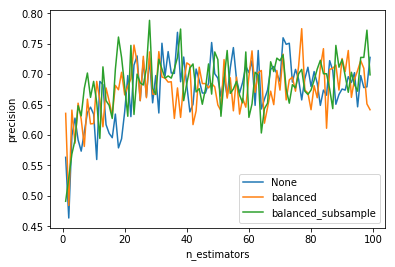

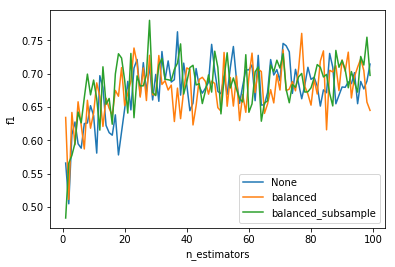

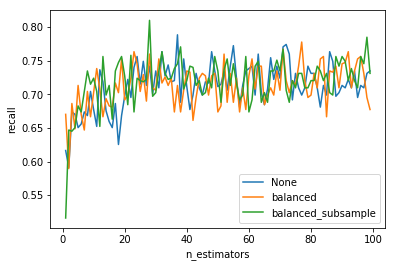

In [51]:
import matplotlib.pyplot as plt

sorted = results.sort_values(['param_n_estimators'])

none_class = sorted[~sorted['param_class_weight'].isin(['balanced', 'balanced_subsample'])]
balanced_class = sorted[sorted['param_class_weight'] == 'balanced']
balancedsub_class = sorted[sorted['param_class_weight'] == 'balanced_subsample']

plt.plot(none_class.param_n_estimators, none_class.mean_test_precision_macro, label="None")
plt.plot(balanced_class.param_n_estimators, balanced_class.mean_test_precision_macro, label="balanced")
plt.plot(balancedsub_class.param_n_estimators, balancedsub_class.mean_test_precision_macro, label="balanced_subsample")
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('precision')
plt.show()

plt.plot(none_class.param_n_estimators, none_class.mean_test_f1_macro, label="None")
plt.plot(balanced_class.param_n_estimators, balanced_class.mean_test_f1_macro, label="balanced")
plt.plot(balancedsub_class.param_n_estimators, balancedsub_class.mean_test_f1_macro, label="balanced_subsample")
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.show()

plt.plot(none_class.param_n_estimators, none_class.mean_test_recall_macro, label="None")
plt.plot(balanced_class.param_n_estimators, balanced_class.mean_test_recall_macro, label="balanced")
plt.plot(balancedsub_class.param_n_estimators, balancedsub_class.mean_test_recall_macro, label="balanced_subsample")
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('recall')
plt.show()

In [5]:
in_matrix = os.path.join(config.CORPUS_PATH, 'matrix.xlsx')
out_matrix = os.path.join(config.CORPUS_PATH, 'matrix-averaged.xlsx')
fe.computeAveragedMatrix(in_matrix, out_matrix)

computeAveragedMatrix(dataFile=C:\IAAA\TER\data\ACORFORMED\Data\matrix.xlsx, outputFile=C:\IAAA\TER\data\ACORFORMED\Data\matrix-averaged.xlsx)


KeyError: "['Avg_HandEntropy_Begin' 'Avg_HandEntropy_Mid' 'Avg_HandEntropy_End'\n 'Avg_SentenceLength_Begin' 'Avg_IPUlen_Begin' 'Avg_IPUlen_Middle'\n 'Ratio1_Begin' 'Ratio1_Mid' 'Ratio1_End' 'Ratio2_Begin' 'Ratio2_Mid'\n 'Ratio2_End'] not in index"

In [5]:
# Sample compute entropy - no phase
recordFile = os.path.join(config.CORPUS_PATH, 'E2C', 'Casque', 'Unity', 'E2B-Casque-Unity-out_record_DATE17-4-21_11-36-34.txt')
print(recordFile)
videoEntropyMatrix(recordFile, [1.00, 0, 0])

C:\IAAA\TER\data\ACORFORMED\Data\E2C\Casque\Unity\E2B-Casque-Unity-out_record_DATE17-4-21_11-36-34.txt
[0.05118677 0.0554765  0.08040169 2.32266021 1.8760701  1.76955979
 2.22080822 2.04534562 2.13997821 0.79974848 1.80746816 0.79989779
 2.47765292 2.26767884 2.27720406]
(15L,)


array([0.05118677, 0.0554765 , 0.08040169, 2.32266021, 1.8760701 ,
       1.76955979, 2.22080822, 2.04534562, 2.13997821, 0.79974848,
       1.80746816, 0.79989779, 2.47765292, 2.26767884, 2.27720406])

In [47]:
import pandas as pd

del samples
del in_matrix
in_matrix = os.path.join('C:\\', 'IAAA', 'TER', 'data', 'Project - PresenceAutomaticPrediction', 
                         'Pre-processed data', 'matrix.xlsx')
samples = pd.read_excel(in_matrix)
#names = ("Expert", "Head_Entropy_Start", "Head_Entropy_Mid", "Head_Entropy_End", "Avg_HandEntropy_Begin", "Avg_HandEntropy_Mid", "Avg_HandEntropy_End", "Avg_SentenceLength_Begin", "Avg_SentenceLength_Mid", "Avg_SentenceLength_End", "Avg_IPUlen_Begin", "Avg_IPUlen_Middle", "Avg_IPUlen_End", "Ratio1_Begin", "Ratio1_Mid", "Ratio1_End", "Ratio2_Begin", "Ratio2_Mid", "Ratio2_End", "Duration")
#samples = samples[list(names)]

In [48]:
samples.drop(['Candidate', 'Environment'], axis=1)

,Expert,Head_Entropy_Start,Head_Entropy_Mid,Head_Entropy_End,LeftWrist_Entropy_Start,LeftWrist_Entropy_Mid,LeftWrist_Entropy_End,RightWrist_Entropy_Start,RightWrist_Entropy_Mid,RightWrist_Entropy_End,...,Ratio1_Mid,Ratio1_End,Ratio2_Begin,Ratio2_Mid,Ratio2_End,Duration,Presence Score,Presence Class,Co-presence Score,Co-presence Class
0,0,1.620065,2.772323,2.041698,1.392627,2.688408,1.222870,1.626681,3.165677,1.373161,...,0.136882,0.111111,0.163636,0.201521,0.222222,176.69000,2.153846,1,2.5,2
1,0,1.607020,3.375025,1.685876,1.430639,3.252918,1.806254,1.664035,3.192419,1.566622,...,0.169576,0.232143,0.202703,0.199501,0.160714,223.46875,3.714286,3,2.6,2
2,0,1.894657,3.235629,1.760955,1.582671,3.376458,2.134019,1.700208,3.319778,2.055413,...,0.135211,0.177215,0.222222,0.239437,0.240506,228.43750,3.500000,3,2.5,2
3,0,1.208405,2.840889,1.755899,1.623034,2.225854,1.470777,1.702093,2.487293,1.651560,...,0.176692,0.148148,0.219512,0.176692,0.259259,136.46875,1.000000,1,3.8,3
4,0,1.810643,2.842002,0.700632,1.121666,2.184798,0.663117,1.081686,0.597489,0.356056,...,0.190722,0.357143,0.181818,0.185567,0.142857,116.56250,4.384615,3,4.1,3
5,0,1.602321,2.833371,1.835899,1.225035,2.275394,1.752965,1.228537,2.567528,1.281582,...,0.176471,0.238095,0.127660,0.182353,0.238095,171.00000,2.071429,1,3.2,2
6,0,2.158885,3.161219,1.675367,1.504347,2.475369,1.792509,1.778807,1.586119,1.472081,...,0.157635,0.260870,0.204545,0.182266,0.173913,181.60000,2.571429,2,3.3,2
7,0,1.326662,2.690200,1.128224,1.691715,2.424334,1.508885,0.499812,2.010809,1.153278,...,0.084112,0.266667,0.166667,0.205607,0.200000,109.03125,4.153846,3,3.1,2
8,0,1.205576,2.745344,1.128501,0.237131,2.355243,0.836073,1.020001,2.298857,0.892259,...,0.141176,0.000000,0.117647,0.141176,0.500000,98.12500,3.000000,2,2.8,2
9,0,1.662336,2.856660,0.928306,1.294070,1.053877,1.245376,1.363724,2.627678,0.618966,...,0.151163,0.000000,0.142857,0.162791,0.500000,95.88000,3.928571,3,3.1,2


In [49]:
samples['Head_Entropy_Avg'] = samples[['Head_Entropy_Start', 'Head_Entropy_Mid', 'Head_Entropy_End']].mean(axis=1)
samples['Avg_HandEntropy_Avg'] = samples[['Avg_HandEntropy_Begin', 'Avg_HandEntropy_Mid', 'Avg_HandEntropy_End']].mean(axis=1)

samples

,Candidate,Environment,Expert,Head_Entropy_Start,Head_Entropy_Mid,Head_Entropy_End,LeftWrist_Entropy_Start,LeftWrist_Entropy_Mid,LeftWrist_Entropy_End,RightWrist_Entropy_Start,...,Ratio2_Begin,Ratio2_Mid,Ratio2_End,Duration,Presence Score,Presence Class,Co-presence Score,Co-presence Class,Head_Entropy_Avg,Avg_HandEntropy_Avg
0,N12F,PC,0,1.620065,2.772323,2.041698,1.392627,2.688408,1.222870,1.626681,...,0.163636,0.201521,0.222222,176.69000,2.153846,1,2.5,2,2.144696,1.930877
1,N12F,Cave,0,1.607020,3.375025,1.685876,1.430639,3.252918,1.806254,1.664035,...,0.202703,0.199501,0.160714,223.46875,3.714286,3,2.6,2,2.222640,2.159807
2,N12F,Casque,0,1.894657,3.235629,1.760955,1.582671,3.376458,2.134019,1.700208,...,0.222222,0.239437,0.240506,228.43750,3.500000,3,2.5,2,2.297080,2.195308
3,N1A,PC,0,1.208405,2.840889,1.755899,1.623034,2.225854,1.470777,1.702093,...,0.219512,0.176692,0.259259,136.46875,1.000000,1,3.8,3,1.935064,1.887263
4,N1A,Cave,0,1.810643,2.842002,0.700632,1.121666,2.184798,0.663117,1.081686,...,0.181818,0.185567,0.142857,116.56250,4.384615,3,4.1,3,1.784426,1.149845
5,N9C,PC,0,1.602321,2.833371,1.835899,1.225035,2.275394,1.752965,1.228537,...,0.127660,0.182353,0.238095,171.00000,2.071429,1,3.2,2,2.090530,1.572286
6,N9C,Cave,0,2.158885,3.161219,1.675367,1.504347,2.475369,1.792509,1.778807,...,0.204545,0.182266,0.173913,181.60000,2.571429,2,3.3,2,2.331824,2.094930
7,N9C,Casque,0,1.326662,2.690200,1.128224,1.691715,2.424334,1.508885,0.499812,...,0.166667,0.205607,0.200000,109.03125,4.153846,3,3.1,2,1.715029,1.689232
8,N2B,Cave,0,1.205576,2.745344,1.128501,0.237131,2.355243,0.836073,1.020001,...,0.117647,0.141176,0.500000,98.12500,3.000000,2,2.8,2,1.693140,1.481673
9,N2B,Casque,0,1.662336,2.856660,0.928306,1.294070,1.053877,1.245376,1.363724,...,0.142857,0.162791,0.500000,95.88000,3.928571,3,3.1,2,1.815767,1.560241


In [63]:
samples['Tokens_Begin'] = samples[['Freq_Adjective_Begin','Freq_Adverb_Begin','Freq_Auxiliary_Begin','Freq_Conjunction_Begin','Freq_Determiner_Begin','Freq_Noun_Begin','Freq_Preposition_Begin','Freq_Pronoun_Begin','Freq_Verb_Begin']].sum(axis=1)
samples['Tokens_Mid'] = samples[['Freq_Adjective_Mid','Freq_Adverb_Mid','Freq_Auxiliary_Mid','Freq_Conjunction_Mid','Freq_Determiner_Mid','Freq_Noun_Mid','Freq_Preposition_Mid','Freq_Pronoun_Mid','Freq_Verb_Mid']].sum(axis=1)
samples['Tokens_End'] = samples[['Freq_Adjective_End','Freq_Adverb_End','Freq_Auxiliary_End','Freq_Conjunction_End','Freq_Determiner_End','Freq_Noun_End','Freq_Preposition_End','Freq_Pronoun_End','Freq_Verb_End']].sum(axis=1)

samples['TEST_Ratio1Sum_Begin'] = samples[['Freq_Adjective_Begin', 'Freq_Adverb_Begin']].sum(axis=1)
samples['TESt_Ratio1_Begin'] = samples.TEST_Ratio1Sum_Begin.div(samples.TEST_TokensSum_Begin, axis='index')

In [61]:
print(samples['TESt_Ratio1_Begin'])

0     0.137931
1     0.152778
2     0.164706
3     0.205882
4     0.189189
5     0.229167
6     0.146341
7     0.100000
8     0.058824
9     0.000000
10    0.166667
11    0.282609
12    0.125000
13         NaN
14         NaN
15    0.130435
16    0.145833
17    0.114286
18    0.081081
19    0.071429
20    0.142857
21    0.200000
22    0.148148
23    0.111111
24    0.142857
25    0.142857
26    0.176471
27    0.103448
28    0.120000
29    0.170732
        ...   
56    0.054545
57    0.103448
58    0.078125
59    0.035714
60    0.190476
61    0.234043
62    0.266667
63    0.142857
64    0.214286
65    0.171429
66    0.200000
67    0.210526
68    0.132075
69    0.170732
70    0.076923
71    0.040816
72    0.066667
73    0.166667
74    0.076923
75    0.263158
76    0.171429
77    0.119048
78    0.184615
79    0.171429
80    0.275000
81    0.270588
82    0.171875
83    0.059524
84    0.166667
85    0.067797
Name: TESt_Ratio1_Begin, Length: 86, dtype: float64


In [7]:
from pydub import AudioSegment
from os import listdir
from os.path import isfile, join
from xml.dom import minidom

import re
import unicodecsv as csv

def sorted_alphanumeric(data):
    
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

transcriptfile = os.path.join(config.CORPUS_PATH, 'E10D', 'Casque', 'Superviseur', 'session-170623-1627', 'chat-history.170623-1627.xml')


# parse an xml file by name
mydoc = minidom.parse(transcriptfile)

times = []
texts = []

session = mydoc.getElementsByTagName('session')[0]
for item in session.childNodes:
    if item.nodeType != item.TEXT_NODE:
        if item.tagName == 'turn' and item.attributes['speaker'].value == 'greta':
            times.append(int(item.attributes['startTime'].value))
            texts.append(item.childNodes[1].firstChild.data)   
        elif item.tagName == 'event':
            times.append(int(item.attributes['startTime'].value))
            texts.append('')            

#items = mydoc.getElementsByTagName('turn')
#print(len(items))
#for item in items:
#    if item.attributes['speaker'].value == 'greta':
#        times.append(int(item.attributes['startTime'].value))
#        texts.append(item.childNodes[1].firstChild.data)

print(len(times))




np.savetxt('newtexts.txt', texts, fmt='%s')
    
wavdir = os.path.join(config.CORPUS_PATH, 'E10D', 'Casque', 'Unity')
wavfiles = [f for f in sorted_alphanumeric(listdir(wavdir)) if isfile(join(wavdir, f)) and f.endswith(".wav")]
print(wavfiles)
print(len(wavfiles))

if len(wavfiles) != len(times):
    print("There should be as many wav files as  IPU !")

wavs = []
for wavfile in wavfiles:
    song = AudioSegment.from_wav(os.path.join(wavdir, wavfile))
    print(len(song))
    wavs.append(song)
    
newsound = AudioSegment.silent(duration=times[-1] + len(wavfiles[-1]))
for idx, wav in enumerate(wavs):
    newsound = newsound.overlay(wav, position=times[idx])
newsound.export('newsound.wav', format='wav')

# generate CSV file
csvfile=open('newtranscription.csv','wb')
csvwriter=csv.writer(csvfile,quoting=csv.QUOTE_ALL)
for i, (time, text) in enumerate(zip(times, texts)):
    print(i, time, text)
    tb = "{0:.2f}".format(time / 1000)
    te = "{0:.2f}".format((time + len(wavs[i])) / 1000)
    csvwriter.writerow(['ASR-Transcription', tb, te, text.encode('utf8')])
csvfile.close()

28
['0.wav', '1.wav', '2.wav', '3.wav', '4.wav', '5.wav', '6.wav', '7.wav', '8.wav', '9.wav', '10.wav', '11.wav', '12.wav', '13.wav', '14.wav', '15.wav', '16.wav', '17.wav', '18.wav', '19.wav', '20.wav', '21.wav', '22.wav', '23.wav', '24.wav', '25.wav', '26.wav', '27.wav']
28
970
1855
540
1011
1908
3974
4975
3063
3063
4273
2906
1888
1888
540
1855
3381
1855
373
1912
1912
1912
2533
1760
3381
1097
1097
383
1128
(0, 4375, u'bonjour docteur')
(1, 13488, '')
(2, 13978, u'je vois')
(3, 26721, u"Non, docteur, j'ai toujours tr\xe8s mal ici")
(4, 44981, u'Mais, comment \xe7a a pu arriver ?')
(5, 52997, u'Mais, comment \xe7a a pu arriver ?')
(6, 78083, u"mais vous m'aviez dit que c'\xe9tait qu'un petit polype")
(7, 85386, u"mais vous m'aviez dit que c'\xe9tait qu'un petit polype")
(8, 109408, u"mais c'est quoi comme op\xe9ration ?")
(9, 114693, u'mais la chirurgie \xe7a \xe7a consiste en quoi ?')
(10, 127648, '')
(11, 149650, '')
(12, 150141, u'je vois')
(13, 161903, '')
(14, 178052, '')
(15, 190

In [76]:
print(text)
print(text.encode('utf8'))

Non, docteur, j'ai toujours très mal ici
Non, docteur, j'ai toujours très mal ici


In [58]:
print(os.getcwd())

C:\IAAA\TER\dev\src


In [40]:
import os
from os.path import join, getsize
import config

for root, dirs, files in os.walk(config.CORPUS_PATH):
    print(os.path.basename(os.path.normcase(root)))
    if os.path.basename(os.path.normcase(root)) == 'unity':
        split_path = os.path.normpath(root).split(os.path.sep)
        mode = split_path[-2]
        print("mode ", mode)
        print("subject"  +  split_path[-3])

data
e10d
casque
data
merge-wav
features
superviseur
session-170623-1627
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectE10D
video
cave
features
superviseur
session-170623-1650
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Cave')
subjectE10D
video
data
merge-wav
pc
features
superviseur
session-170623-1639
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'PC')
subjectE10D
video
e11e manque video pc
casque
superviseur
session-171005-1747
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectE11E manque video pc
video
cave
superviseur
session-171005-1733
chat-server
received
sent
dialog-manager
received
s4-micro


chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'PC')
subjectE3C manque video
video
e4d
casque
superviseur
session-170421-1321
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectE4D
video
cave
superviseur
session-170421-1348
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Cave')
subjectE4D
video
pc
superviseur
session-170421-1335
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'PC')
subjectE4D
video
e5e
casque
superviseur
session-170421-1428
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectE5E
video
cave
superviseur
session

sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectN17E
video
cave
features
superviseur
session-170308-1016
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Cave')
subjectN17E
video
pc
features
superviseur
session-170308-1005
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'PC')
subjectN17E
video
n18f
casque
features
superviseur
session-170308-1120
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectN18F
video
cave
features
superviseur
session-170308-1131
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Cave')
subjectN18F
video
pc
features
supervis

received
unity
('mode ', 'Casque')
subjectN5E
video
cave
superviseur
session-170224-1336
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Cave')
subjectN5E
video
pc
superviseur
session-170224-1326
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'PC')
subjectN5E
video
n6f
casque
superviseur
session-170227-1026
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
session-170227-1331
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectN6F
video
cave
superviseur
session-170227-1034
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Cave')
subjectN6F
video
pc
supervise